In [290]:
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

# some PCA and GMM stuff
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

import sklearn.ensemble as ske
from sklearn.feature_selection import SelectFromModel

# This first set of cells below are steps for an encoding / feature engineering notebook. Move/replace/reuse when we are ready.

In [291]:
#train_file = 'https://people.ischool.berkeley.edu/~andrew.morris/data/w209/train.csv'
#test_file = 'https://people.ischool.berkeley.edu/~andrew.morris/data/w209/test.csv'
train_file = 'data/mini_train_clean.csv'
train_label_file = 'data/mini_train_labels.csv'

test_file = 'data/mini_test_clean.csv'
test_label_file = 'data/mini_test_labels.csv'

#dev_file = 'data/mini_dev.csv'
#test_file = 'data/test.csv'

In [292]:
dtypes = {
        'MachineIdentifier':                                    'str',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'int8',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'int16',
        'AVProductStatesIdentifier':                            'int32',
        'AVProductsInstalled':                                  'int8',
        'AVProductsEnabled':                                    'int8',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'int32',
        'OrganizationIdentifier':                               'int8',
        'GeoNameIdentifier':                                    'int16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'int8',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'int8',
        'IeVerIdentifier':                                      'int16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'int8',
        'UacLuaenable':                                         'int8',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'int16',
        'Census_OEMModelIdentifier':                            'int16',
        'Census_ProcessorCoreCount':                            'int8',
        'Census_ProcessorManufacturerIdentifier':               'int8',
        'Census_ProcessorModelIdentifier':                      'int16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'int32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'int32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'int32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'int16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'int16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'int16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'int16',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int16',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'int8',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'int8',
        'Census_IsFlightsDisabled':                             'int8',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'int8',
        'Census_FirmwareManufacturerIdentifier':                'int16',
        'Census_FirmwareVersionIdentifier':                     'int16',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'int8',
        'Census_IsVirtualDevice':                               'int8',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'int8',
        'Wdft_IsGamer':                                         'int8',
        'Wdft_RegionIdentifier':                                'int8',
        'Rtp_NaN':                                              'float16',
        'EngineVersion_major':                                  'int8',
        'EngineVersion_minor':                                  'int8',
        'EngineVersion_build1':                                 'int16',
        'EngineVersion_build2':                                 'int8',
        'AppVersion_major':                                     'int8',
        'AppVersion_minor':                                     'int8',
        'AppVersion_build1':                                    'int16',
        'AppVersion_build2':                                    'int16',
        'AvSigVersion_major':                                   'int8',
        'AvSigVersion_minor':                                   'int16',
        'AvSigVersion_build1':                                  'int16',
        'AvSigVersion_build2':                                  'int8',
        'Census_OSVersion_major':                               'int8',
        'Census_OSVersion_minor':                               'int8',
        'Census_OSVersion_build1':                              'int16',
        'Census_OSVersion_build2':                              'int16',
        'OsVer_major':                                          'int8',
        'OsVer_minor':                                          'int8',
        'OsVer_build1':                                         'int8',
        'OsVer_build2':                                         'int8',
        'OsBuildLab_major':                                     'int16',
        'OsBuildLab_minor':                                     'int16',
        'OsBuildLab_platform':                                  'int8',
        'OsBuildLab_release':                                   'int8',
        'OsBuildLab_build1':                                    'int8',
        'OsBuildLab_build2':                                    'int8',
        'HasDetections':                                        'int8'
        }

In [293]:
def reduce_mem(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [321]:
train_data = pd.read_csv(train_file)#, dtype=dtypes)
train_labels = pd.read_csv(train_label_file, header=None)
train_data['HasDetections'] = train_labels
train_data = reduce_mem(train_data)
train_labels = train_data['HasDetections']
import gc
gc.collect()
train_data = train_data.drop(columns='HasDetections')

Memory usage of dataframe is 41.25 MB
Memory usage after optimization is: 7.58 MB
Decreased by 81.6%


In [322]:
for dtype in train_data.dtypes.items():
    print("'{:} '{:}',".format((dtype[0] + "':").ljust(54), dtype[1]))

'ProductName':                                          'category',
'EngineVersion':                                        'category',
'AppVersion':                                           'category',
'AvSigVersion':                                         'category',
'IsBeta':                                               'int8',
'RtpStateBitfield':                                     'int8',
'IsSxsPassiveMode':                                     'int8',
'DefaultBrowsersIdentifier':                            'int16',
'AVProductStatesIdentifier':                            'int32',
'AVProductsInstalled':                                  'int8',
'AVProductsEnabled':                                    'int8',
'HasTpm':                                               'int8',
'CountryIdentifier':                                    'int16',
'CityIdentifier':                                       'int32',
'OrganizationIdentifier':                               'int8',
'GeoNameIdentifier':

In [323]:
test_data = pd.read_csv(test_file)#, dtype=dtypes)
test_labels = pd.read_csv(test_label_file, header=None)
test_data['HasDetections'] = test_labels
test_data = reduce_mem(test_data)
test_labels = test_data['HasDetections']
import gc
gc.collect()
test_data = test_data.drop(columns='HasDetections')

Memory usage of dataframe is 41.25 MB
Memory usage after optimization is: 7.58 MB
Decreased by 81.6%


In [324]:
for dtype in train_data.dtypes.items():
    print("'{:}',".format(dtype[0]))

'ProductName',
'EngineVersion',
'AppVersion',
'AvSigVersion',
'IsBeta',
'RtpStateBitfield',
'IsSxsPassiveMode',
'DefaultBrowsersIdentifier',
'AVProductStatesIdentifier',
'AVProductsInstalled',
'AVProductsEnabled',
'HasTpm',
'CountryIdentifier',
'CityIdentifier',
'OrganizationIdentifier',
'GeoNameIdentifier',
'LocaleEnglishNameIdentifier',
'Platform',
'Processor',
'OsVer',
'OsBuild',
'OsSuite',
'OsPlatformSubRelease',
'OsBuildLab',
'SkuEdition',
'IsProtected',
'AutoSampleOptIn',
'PuaMode',
'SMode',
'IeVerIdentifier',
'SmartScreen',
'Firewall',
'UacLuaenable',
'Census_MDC2FormFactor',
'Census_DeviceFamily',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorCoreCount',
'Census_ProcessorManufacturerIdentifier',
'Census_ProcessorModelIdentifier',
'Census_ProcessorClass',
'Census_PrimaryDiskTotalCapacity',
'Census_PrimaryDiskTypeName',
'Census_SystemVolumeTotalCapacity',
'Census_HasOpticalDiskDrive',
'Census_TotalPhysicalRAM',
'Census_ChassisTypeName',
'Census_Interna

In [325]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = [c for c,v in train_data.dtypes.items() if v in numerics and c in train_data.columns]

In [326]:
nominal_cols = [c for c in train_data.columns if (c not in numeric_cols)]

In [327]:
binary_cols = [c for c in train_data.columns if (train_data[c].nunique() == 2 and c not in nominal_cols)]

In [328]:
unary_cols = [c for c in train_data.columns if (train_data[c].nunique() == 1 and c not in nominal_cols)]
unary_cols

['EngineVersion_major',
 'EngineVersion_minor',
 'AppVersion_major',
 'AvSigVersion_major',
 'AvSigVersion_build2',
 'Census_OSVersion_major',
 'Census_OSVersion_minor',
 'OsBuildLab_platform',
 'OsBuildLab_release']

In [329]:
for c in unary_cols:
    train_data = train_data.drop(columns=c)
    test_data = test_data.drop(columns=c)

In [332]:
continuous_cols = [c for c in numeric_cols if (c not in np.concatenate((binary_cols, unary_cols)))]

In [334]:
for item in train_data[nominal_cols].dtypes.items():
    print(item)

('ProductName', CategoricalDtype(categories=['mse', 'mseprerelease', 'win8defender'], ordered=False))
('EngineVersion', CategoricalDtype(categories=['1.1.11701.0', '1.1.12805.0', '1.1.12902.0', '1.1.13000.0',
                  '1.1.13103.0', '1.1.13202.0', '1.1.13303.0', '1.1.13407.0',
                  '1.1.13504.0', '1.1.13601.0', '1.1.13701.0', '1.1.13704.0',
                  '1.1.13802.0', '1.1.13804.0', '1.1.13903.0', '1.1.14001.0',
                  '1.1.14003.0', '1.1.14104.0', '1.1.14201.0', '1.1.14202.0',
                  '1.1.14303.0', '1.1.14305.0', '1.1.14306.0', '1.1.14405.2',
                  '1.1.14500.2', '1.1.14500.5', '1.1.14600.4', '1.1.14700.3',
                  '1.1.14700.4', '1.1.14700.5', '1.1.14800.1', '1.1.14800.3',
                  '1.1.14901.3', '1.1.14901.4', '1.1.15000.1', '1.1.15000.2',
                  '1.1.15100.1', '1.1.15200.1', '1.1.15300.5', '1.1.15300.6'],
                 ordered=False))
('AppVersion', CategoricalDtype(categories=['4.10.14393

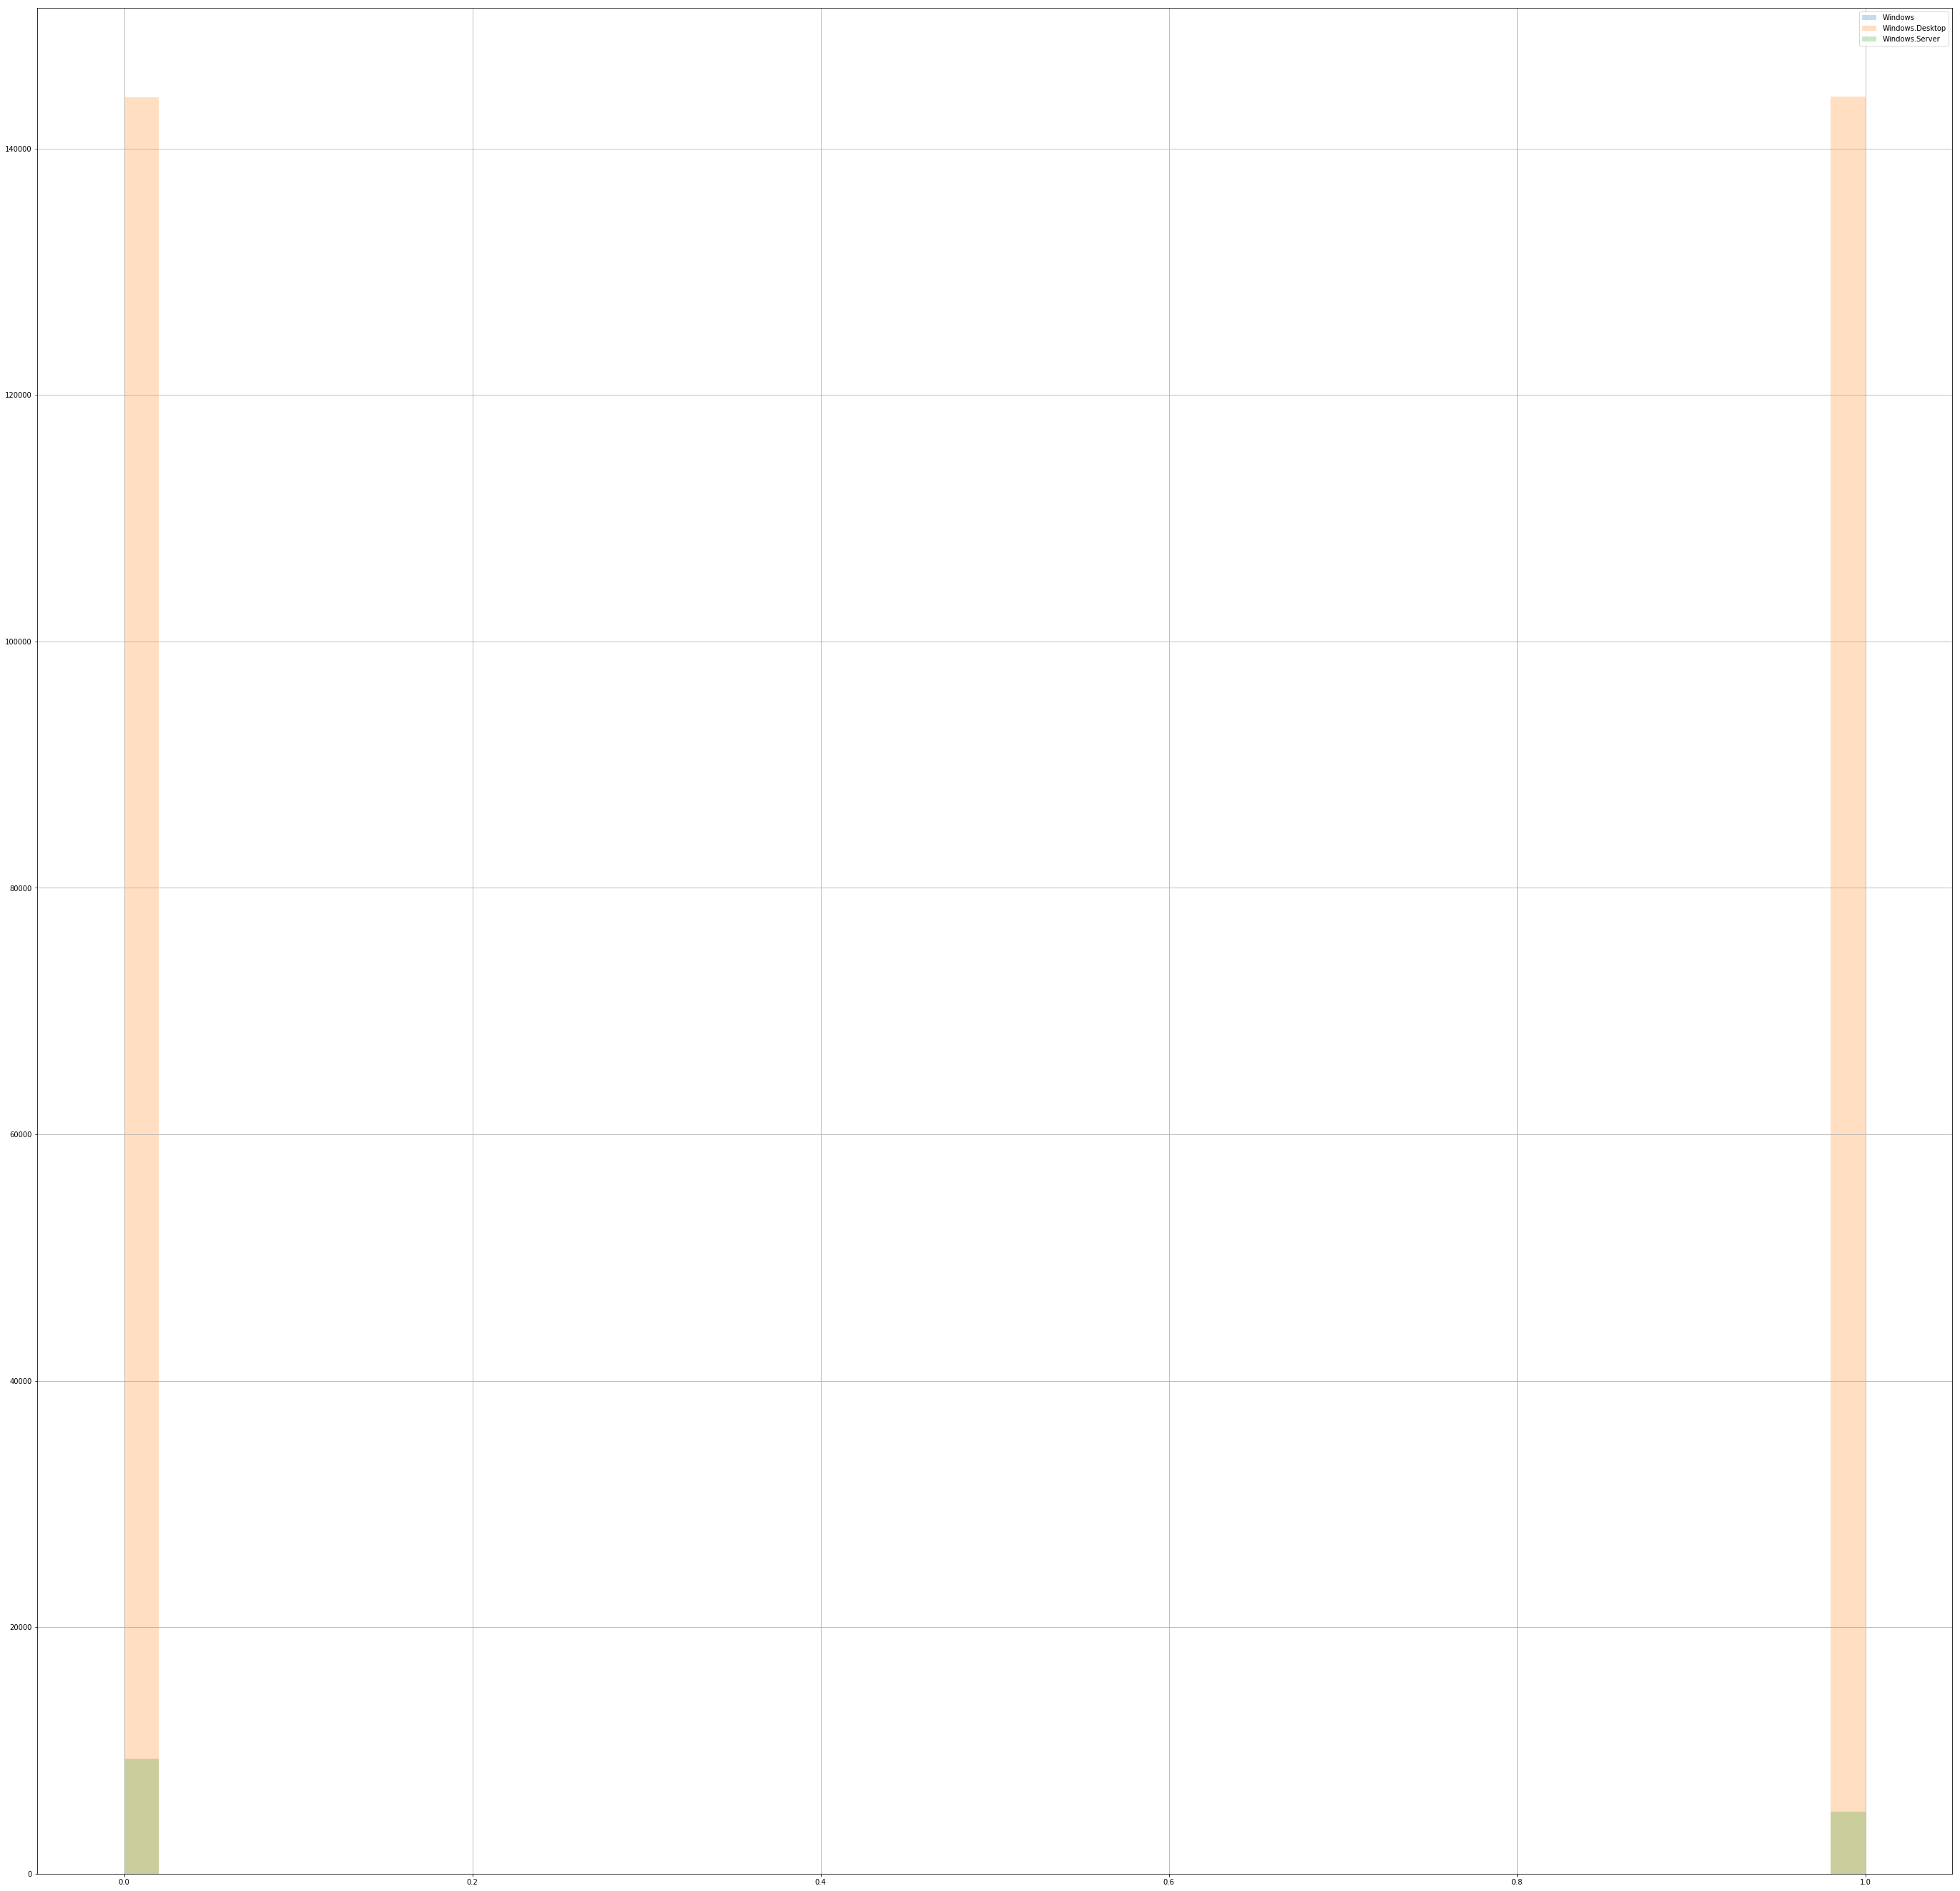

In [210]:
train_data['HasDetections'] = train_labels

filter=train_data['Platform']!='windows10'

groups = train_data[filter].groupby('Census_DeviceFamily').HasDetections

fig, ax = plt.subplots()

for k, v in groups:
    v.hist(label=k, alpha=.25, ax=ax, figsize=(48,48), bins=50)

ax.legend()
train_data = train_data.drop(columns='HasDetections')

In [335]:
# Additional encoding TBD
print("Columns to review NaN values:")
train_data.isna().any()[lambda x: x]

Columns to review NaN values:


Series([], dtype: bool)

In [18]:
# Let's get a feeling for range of values in the nominal categories

In [336]:
train_data[nominal_cols].describe().transpose()

,count,unique,top,freq
ProductName,50000,3,win8defender,49444
EngineVersion,50000,40,1.1.15200.1,21787
AppVersion,50000,72,4.18.1807.18075,28981
AvSigVersion,50000,3088,1.273.1420.0,572
Platform,50000,4,windows10,48308
Processor,50000,3,x64,45354
OsVer,50000,5,10.0.0.0,48368
OsPlatformSubRelease,50000,9,rs4,21890
OsBuildLab,50000,314,17134.1.amd64fre.rs4_release.180410-1804,20418
SkuEdition,50000,8,Home,30943


In [337]:
# Encode nominal variables as labeled strings
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i, col in enumerate(nominal_cols):
    train_data[col] = encoder.fit_transform(train_data[col].astype(str))
    test_data[col] = encoder.fit_transform(test_data[col].astype(str))

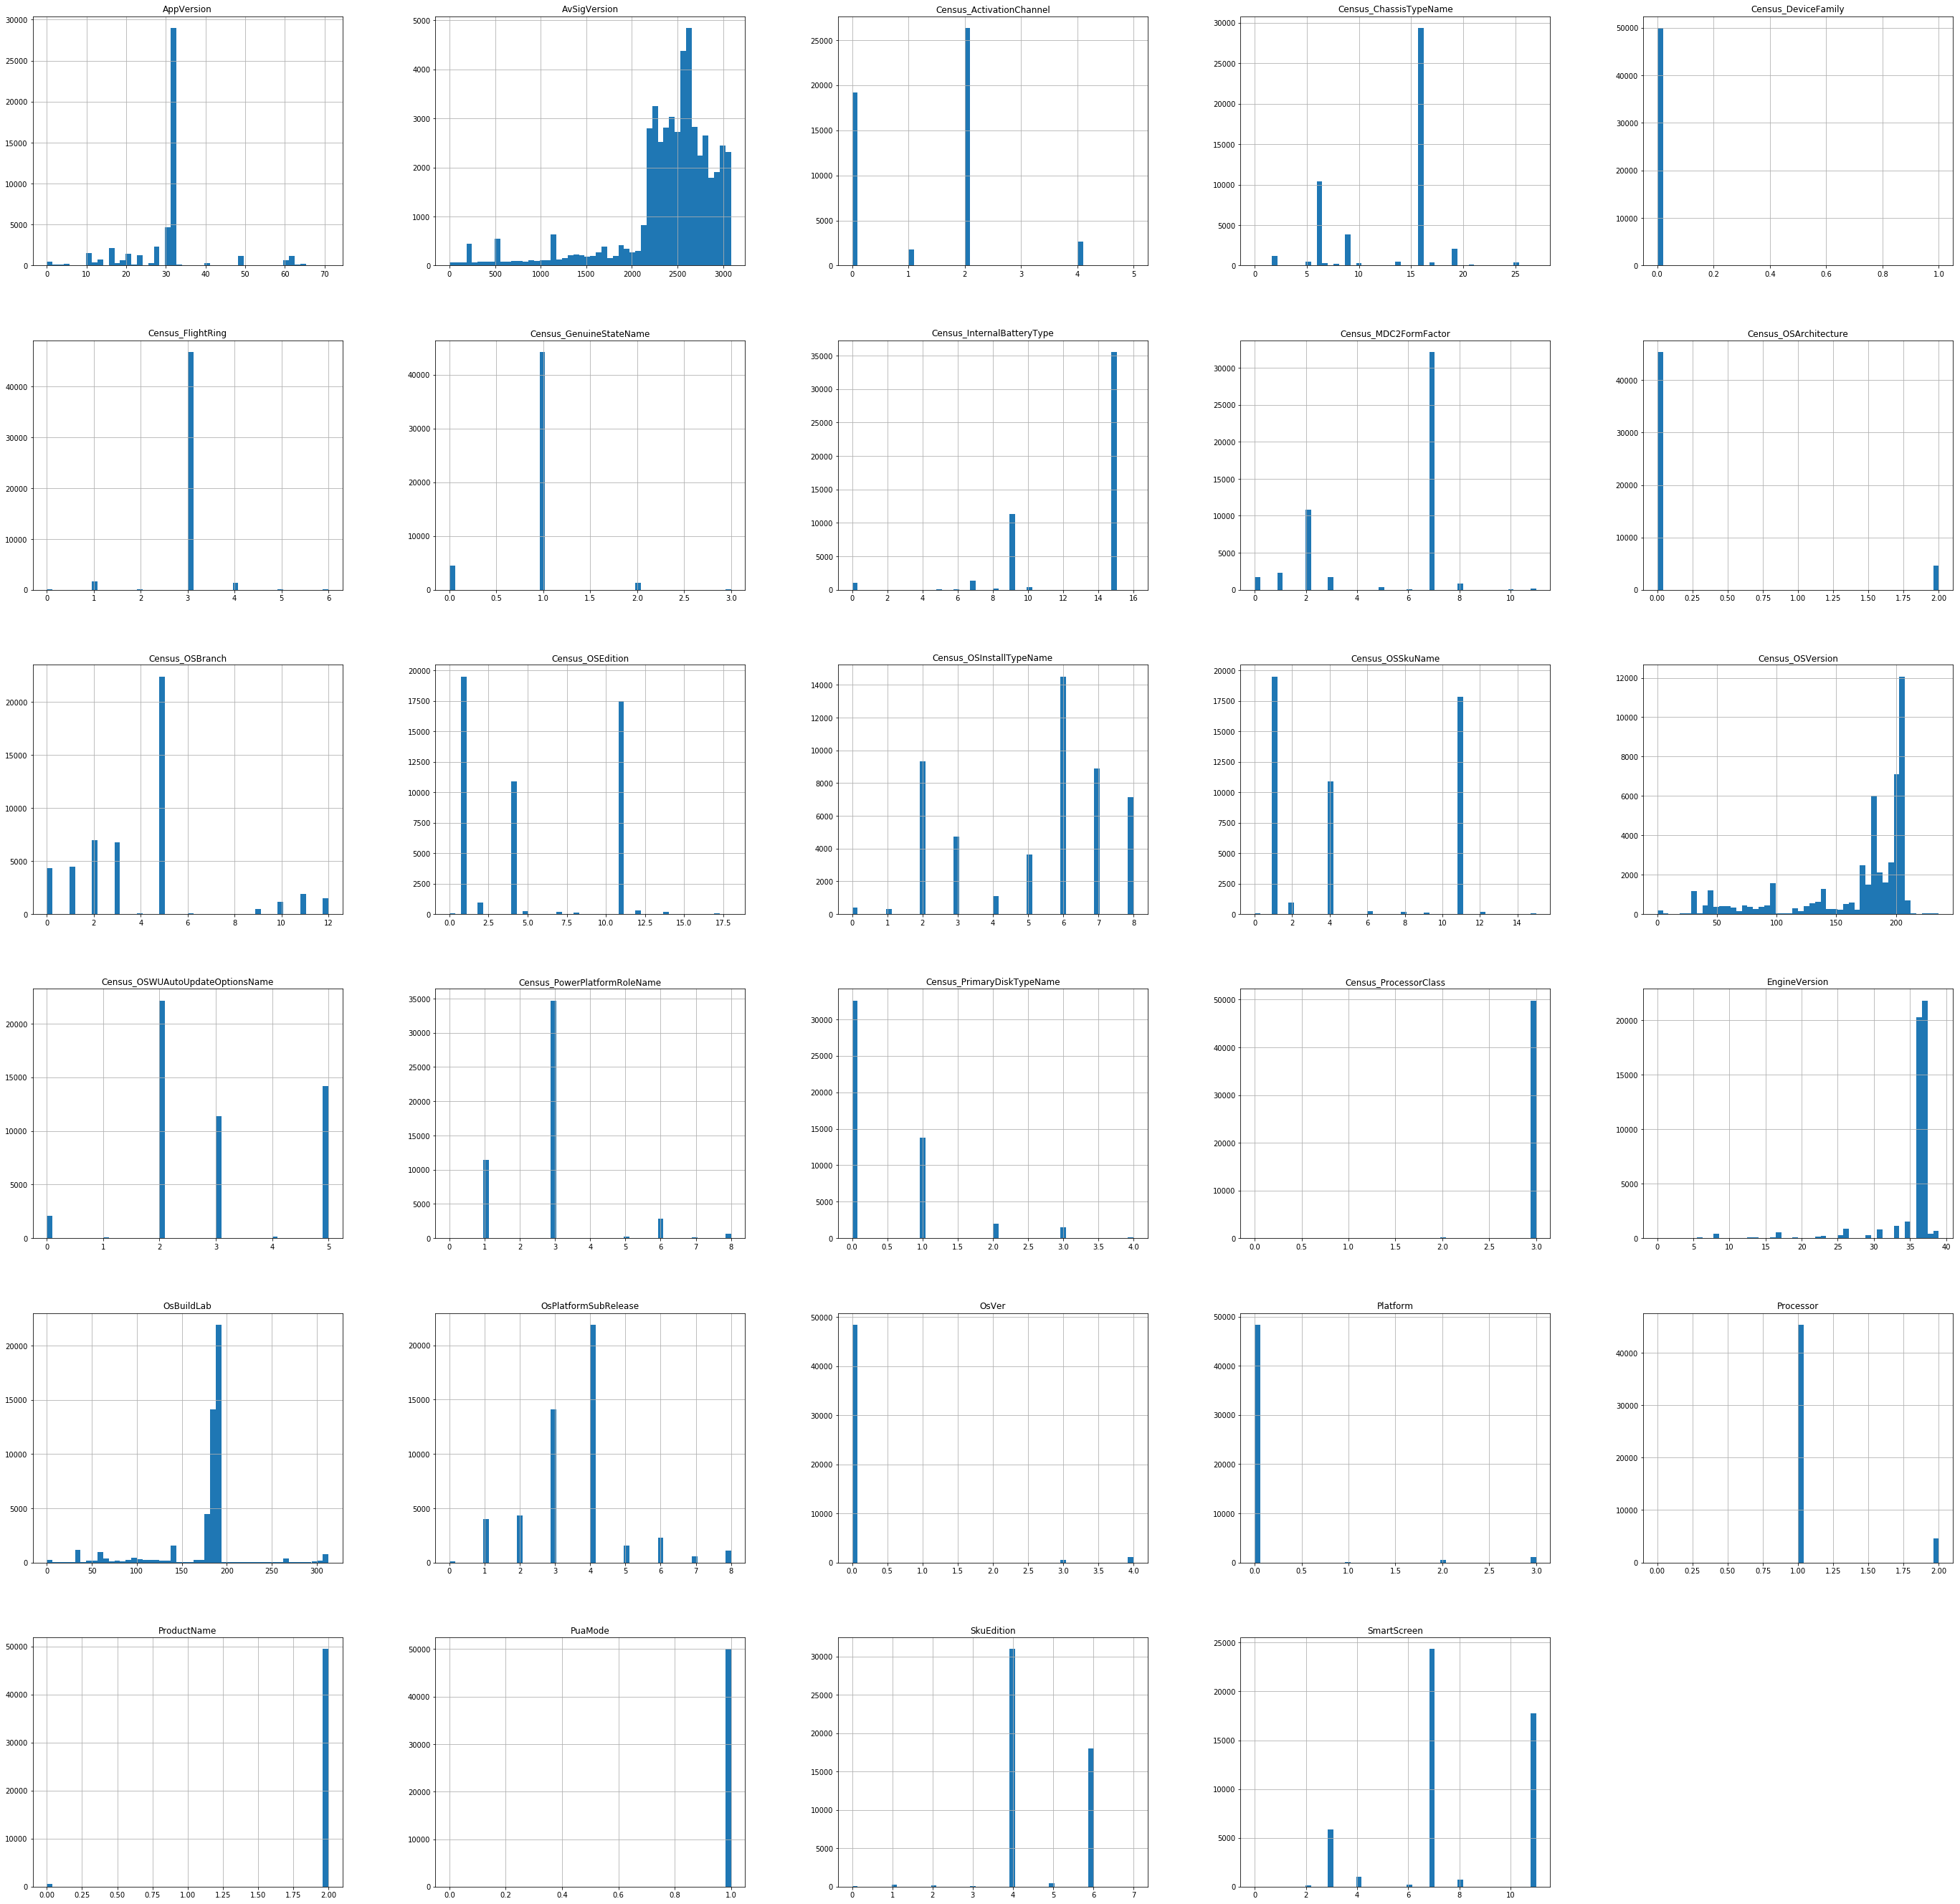

In [338]:
train_data[nominal_cols].hist(figsize=(48,48), bins=50)
plt.show()

In [339]:
for i, col in enumerate(nominal_cols):
    print('The number of values for {:} = {:}'.format(col, (len(list(train_data[col].unique())))))

The number of values for ProductName = 3
The number of values for EngineVersion = 40
The number of values for AppVersion = 72
The number of values for AvSigVersion = 3088
The number of values for Platform = 4
The number of values for Processor = 3
The number of values for OsVer = 5
The number of values for OsPlatformSubRelease = 9
The number of values for OsBuildLab = 314
The number of values for SkuEdition = 8
The number of values for PuaMode = 2
The number of values for SmartScreen = 12
The number of values for Census_MDC2FormFactor = 12
The number of values for Census_DeviceFamily = 2
The number of values for Census_ProcessorClass = 4
The number of values for Census_PrimaryDiskTypeName = 5
The number of values for Census_ChassisTypeName = 28
The number of values for Census_PowerPlatformRoleName = 9
The number of values for Census_InternalBatteryType = 17
The number of values for Census_OSVersion = 237
The number of values for Census_OSArchitecture = 3
The number of values for Census

In [340]:
correlated_cols = []
for i, col in enumerate(nominal_cols):
    corr = train_labels.corr(train_data[col])
    if(corr > 0.05  or corr < -0.05):
        star='(*)' # flag the highly correlated nominal variables
        correlated_cols.append(col)
    else:
        star=''
    print('The correlation of {:} with the outcome variable is {:7.6f}{:}'.format(col, corr, star))

The correlation of ProductName with the outcome variable is 0.000621
The correlation of EngineVersion with the outcome variable is 0.053653(*)
The correlation of AppVersion with the outcome variable is 0.013707
The correlation of AvSigVersion with the outcome variable is 0.055020(*)
The correlation of Platform with the outcome variable is 0.004980
The correlation of Processor with the outcome variable is -0.060893(*)
The correlation of OsVer with the outcome variable is 0.005963
The correlation of OsPlatformSubRelease with the outcome variable is 0.017668
The correlation of OsBuildLab with the outcome variable is 0.020445
The correlation of SkuEdition with the outcome variable is 0.024118
The correlation of PuaMode with the outcome variable is -0.007754
The correlation of SmartScreen with the outcome variable is -0.138915(*)
The correlation of Census_MDC2FormFactor with the outcome variable is -0.012594
The correlation of Census_DeviceFamily with the outcome variable is -0.016600
The c

In [341]:
correlated_cols

['EngineVersion',
 'AvSigVersion',
 'Processor',
 'SmartScreen',
 'Census_OSArchitecture']

In [342]:
train_data[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RtpStateBitfield,50000.0,6.82514,1.088884,0.0,7.00,7.0,7.00,8.0
DefaultBrowsersIdentifier,50000.0,81.37102,420.139139,0.0,0.00,0.0,0.00,3195.0
AVProductStatesIdentifier,50000.0,47662.09716,14317.969130,0.0,49480.00,53447.0,53447.00,70469.0
AVProductsInstalled,50000.0,1.31744,0.542805,-1.0,1.00,1.0,2.00,5.0
AVProductsEnabled,50000.0,1.01402,0.211339,-1.0,1.00,1.0,1.00,5.0
CountryIdentifier,50000.0,108.09510,63.106851,1.0,51.00,97.0,162.00,222.0
CityIdentifier,50000.0,78143.07294,50382.607161,-1.0,31179.00,77794.0,120943.00,167938.0
OrganizationIdentifier,50000.0,16.84282,12.864750,-1.0,-1.00,18.0,27.00,52.0
GeoNameIdentifier,50000.0,169.67138,89.468988,-1.0,89.00,181.0,267.00,296.0
LocaleEnglishNameIdentifier,50000.0,122.49072,69.347267,1.0,74.00,88.0,182.00,283.0


In [191]:
# Andrew's temporary draft for StandardScaler.  Pasting in Kevin's variation, as well:

#inverse_cols = [i for i in train_data.columns if i not in numeric_cols]
#features = train_data[numeric_cols]
#ct = ColumnTransformer([('transform', StandardScaler(), numeric_cols)], remainder='passthrough')
#ct.fit_transform(features)
#train_data_scaled = pd.DataFrame(features, index=train_data.index, columns=numeric_cols)
#inverse_data = pd.DataFrame(train_data[inverse_cols], index=train_data.index, columns=inverse_cols)
#frames = [train_data_scaled, inverse_data]
#train_data2 = pd.concat(frames, sort=False)
#train_data2.describe()

# Kevin's version:
from sklearn.preprocessing import StandardScaler
features = train_data[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
train_data[continuous_cols] = features

#from sklearn.preprocessing import StandardScaler
#train_data[numeric_cols] = data[[numeric_cols].apply(
#                           lambda x: StandardScaler().fit_transform(x))


features = test_data[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
test_data[continuous_cols] = features


#for i, col in enumerate(numeric_cols):
#    standard_scaler = StandardScaler().fit(train_data[col].values)
#    train_data[col] = standard_scaler.transform(train_data[col])
#    test_data[col] = standard_scaler.transform(test_data[col])



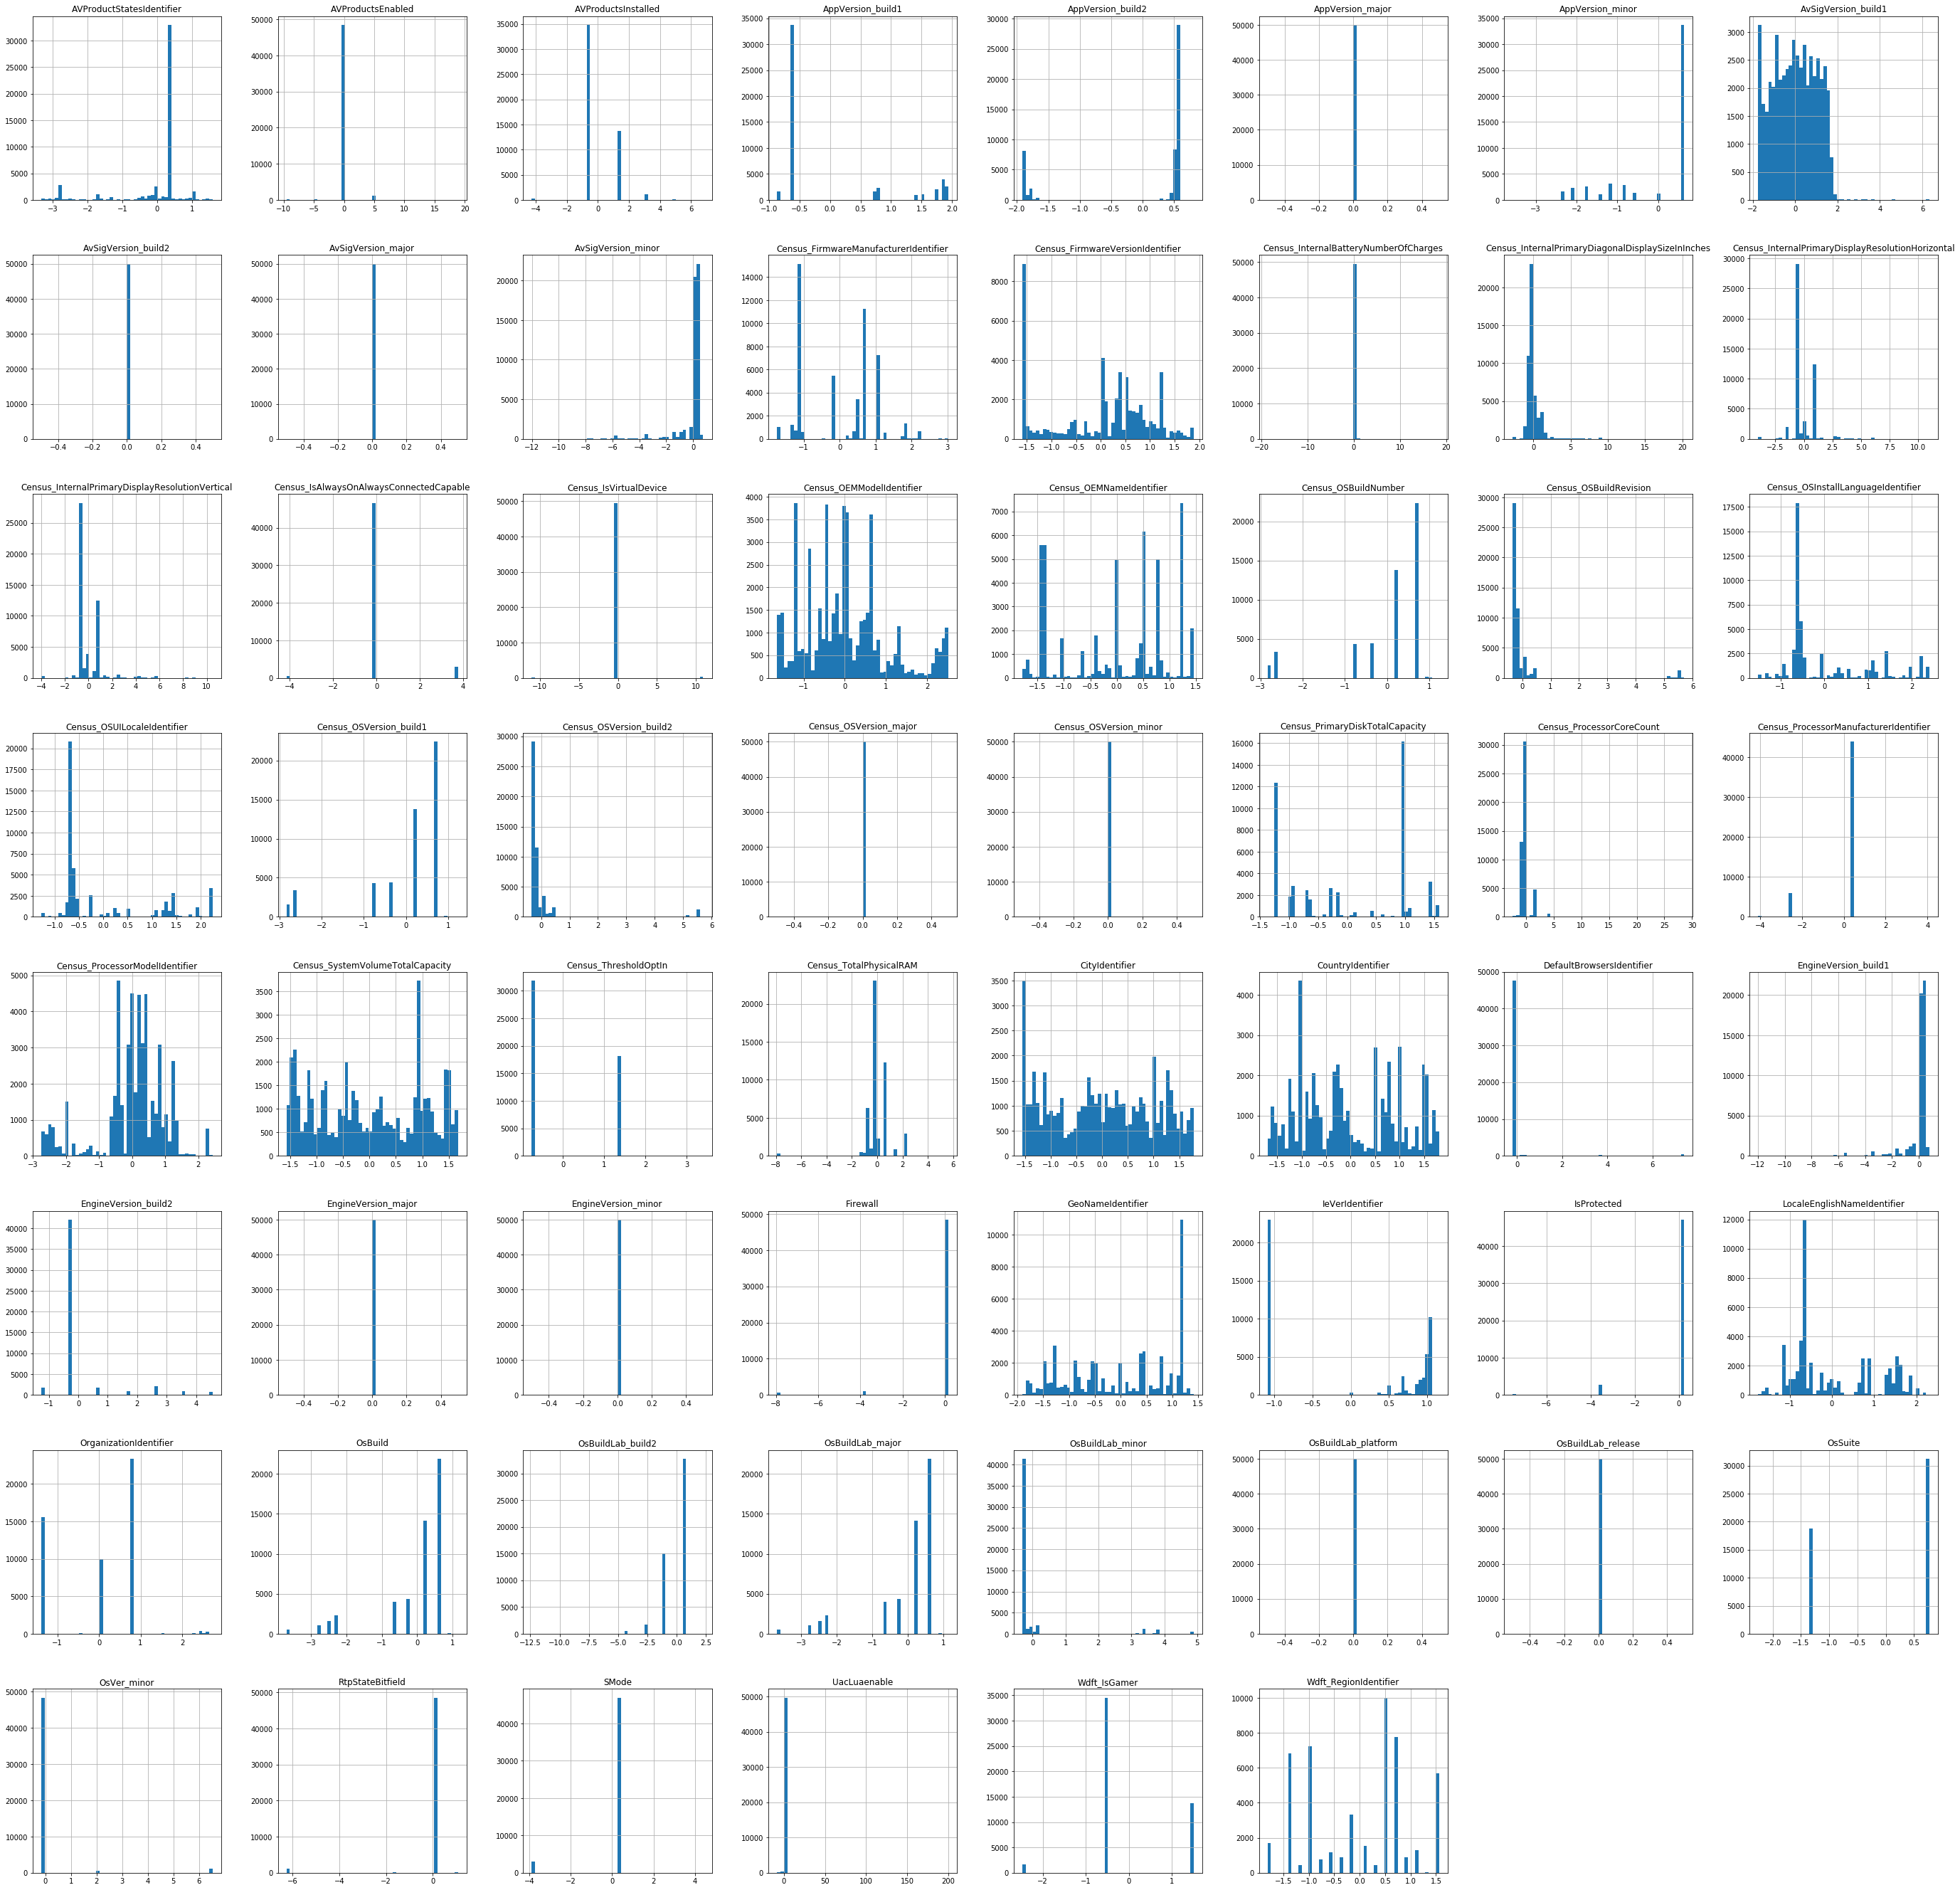

In [190]:
train_data[continuous_cols].hist(figsize=(48,48), bins=50)
plt.show()

In [313]:
train_data[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IsBeta,50000.0,0.000020,0.004472,0.0,0.0,0.0,0.0,1.0
IsSxsPassiveMode,50000.0,0.016880,0.128823,0.0,0.0,0.0,0.0,1.0
HasTpm,50000.0,0.987680,0.110311,0.0,1.0,1.0,1.0,1.0
AutoSampleOptIn,50000.0,0.000020,0.004472,0.0,0.0,0.0,0.0,1.0
Census_HasOpticalDiskDrive,50000.0,0.078300,0.268646,0.0,0.0,0.0,0.0,1.0
Census_IsPortableOperatingSystem,50000.0,0.000580,0.024076,0.0,0.0,0.0,0.0,1.0
Census_IsFlightingInternal,50000.0,-0.829340,0.376215,-1.0,-1.0,-1.0,-1.0,0.0
Census_IsFlightsDisabled,50000.0,-0.018680,0.135394,-1.0,0.0,0.0,0.0,0.0
Census_IsSecureBootEnabled,50000.0,0.486740,0.499829,0.0,0.0,0.0,1.0,1.0
Census_IsWIMBootEnabled,50000.0,-0.635180,0.481384,-1.0,-1.0,-1.0,0.0,0.0


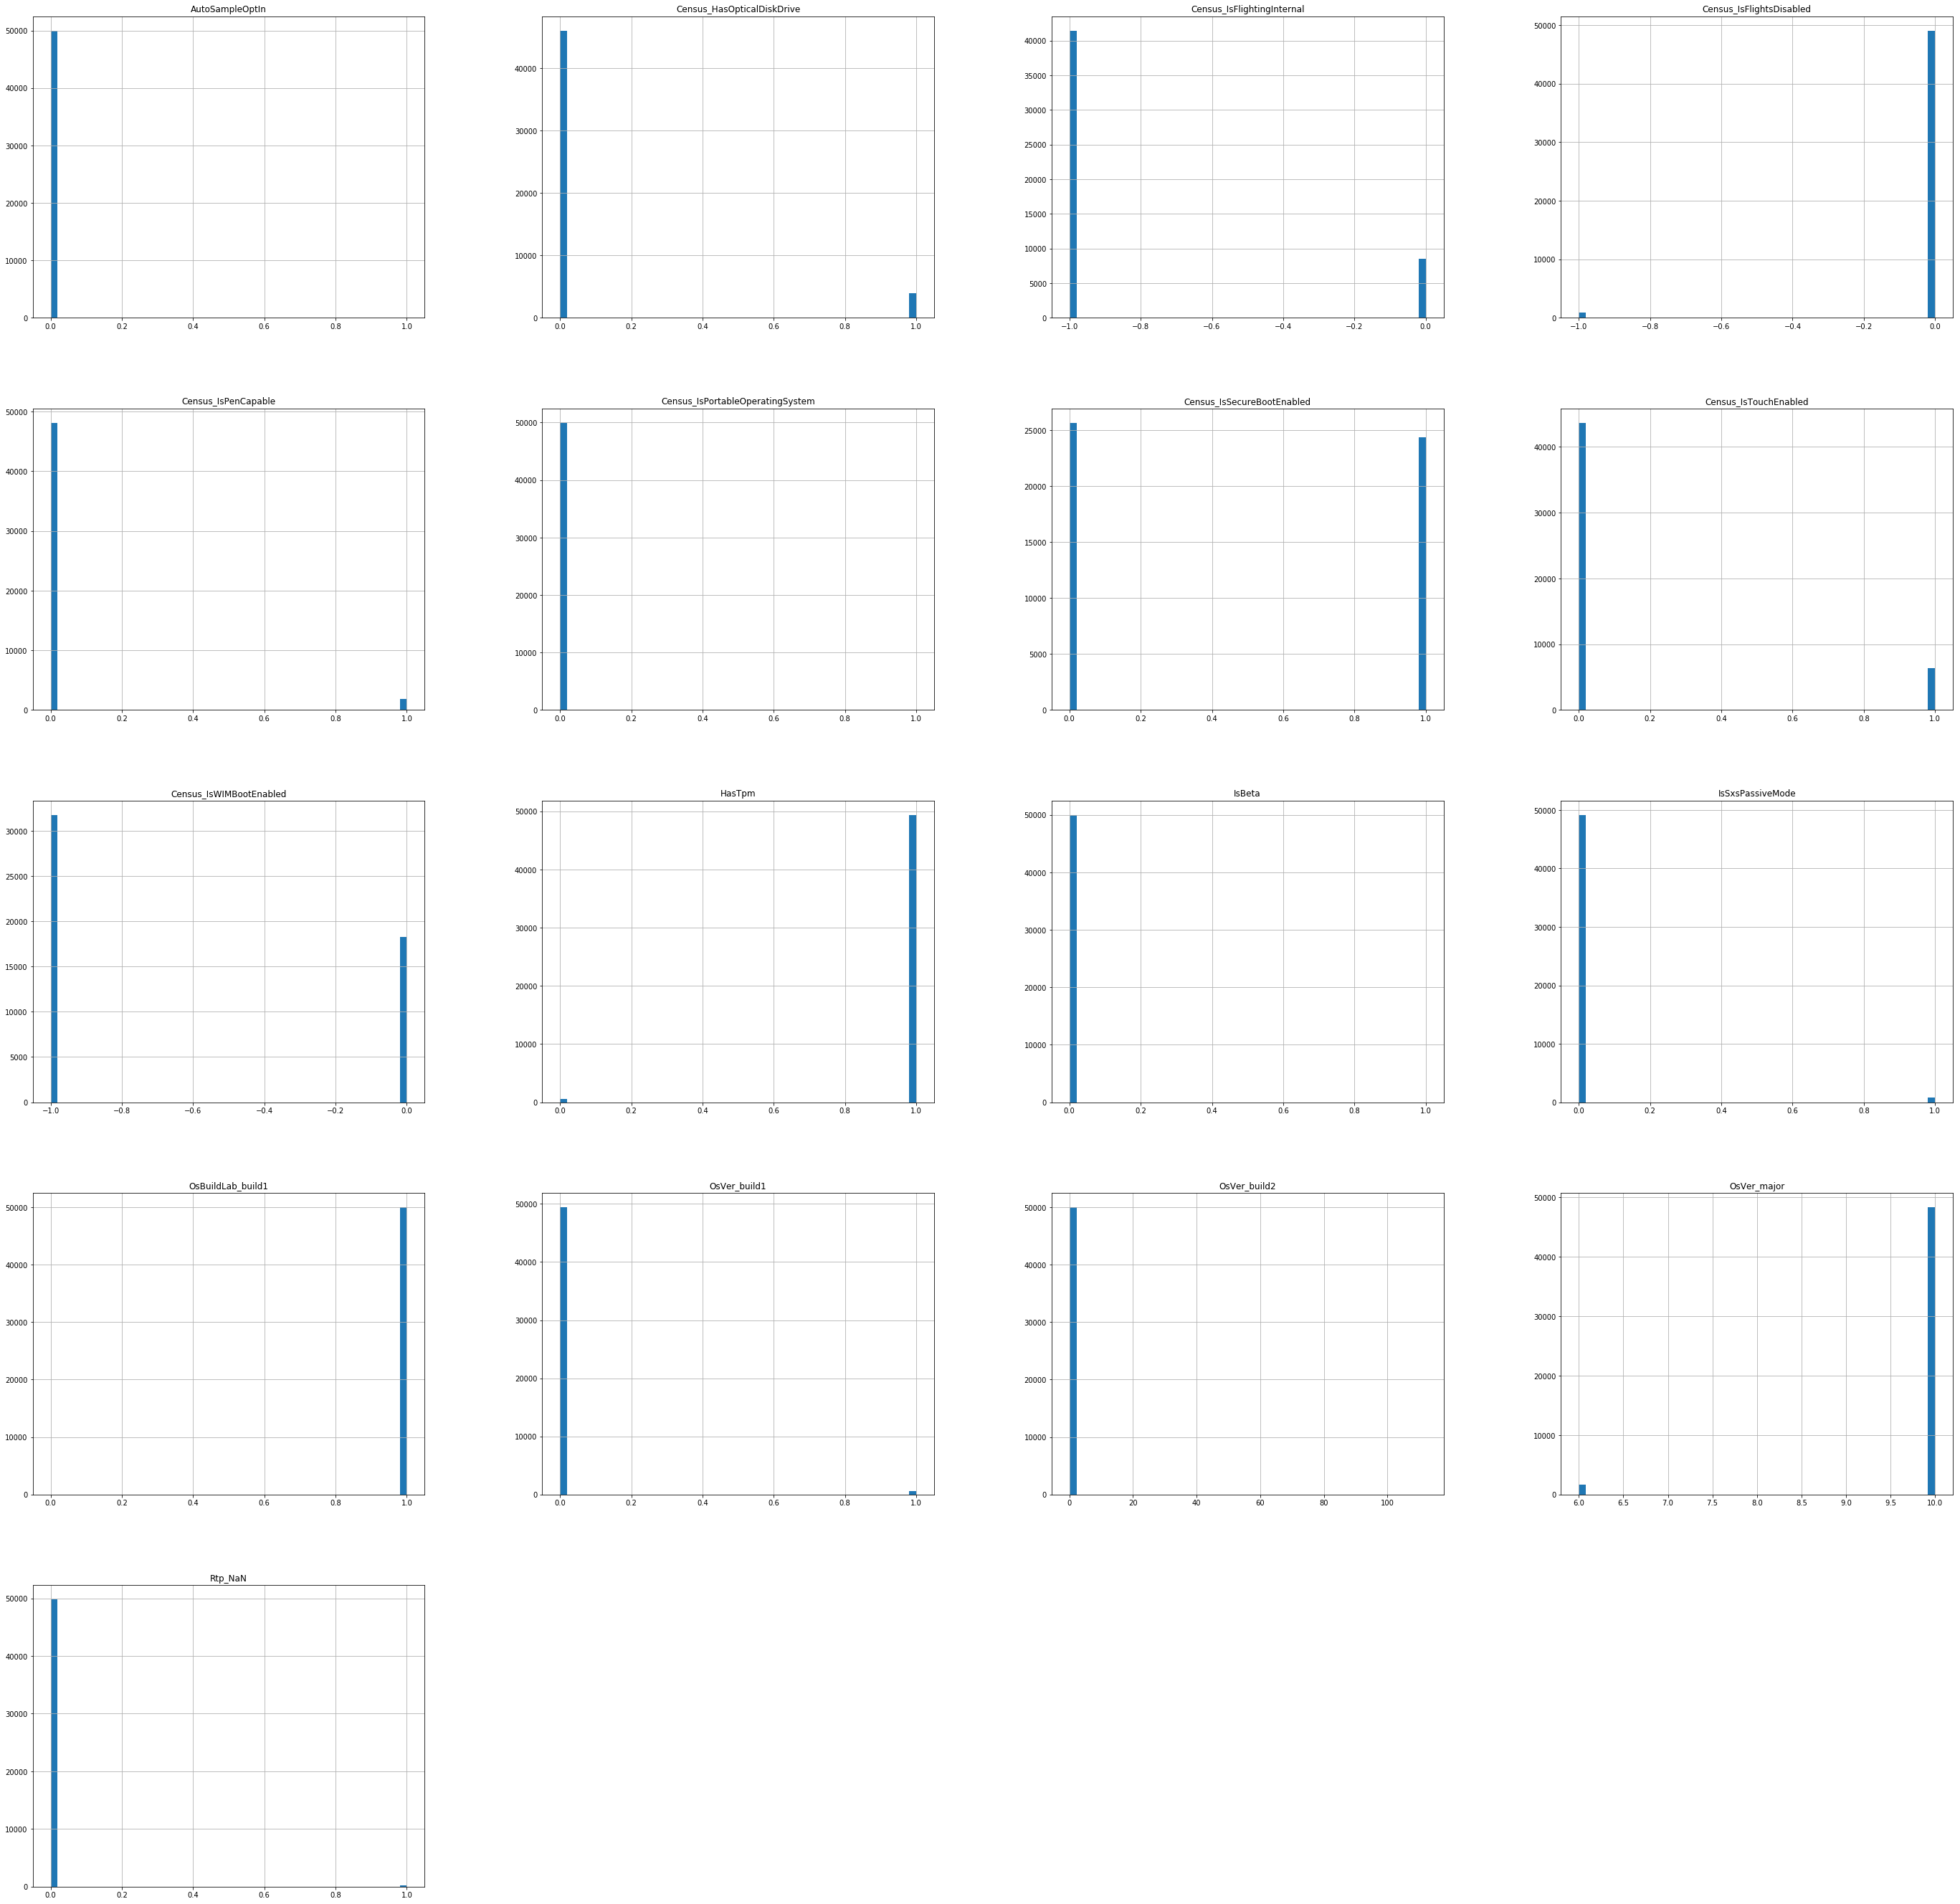

In [78]:
train_data[binary_cols].hist(figsize=(48,48), bins=50)
plt.show()

In [79]:
for i, col in enumerate(numeric_cols):
    corr = train_labels.corr(train_data[col])
    if(corr > 0.05  or corr < -0.05):
        star='(*)' # flag the highly correlated numeric variables
        correlated_cols.append(col)
    else:
        star=''
    print('The correlation of {:} with the outcome variable is {:7.6f}{:}'.format(col, corr, star))

The correlation of IsBeta with the outcome variable is -0.004470
The correlation of RtpStateBitfield with the outcome variable is 0.036095
The correlation of IsSxsPassiveMode with the outcome variable is -0.030993
The correlation of DefaultBrowsersIdentifier with the outcome variable is -0.020600
The correlation of AVProductStatesIdentifier with the outcome variable is 0.115062(*)
The correlation of AVProductsInstalled with the outcome variable is -0.142484(*)
The correlation of AVProductsEnabled with the outcome variable is -0.026374
The correlation of HasTpm with the outcome variable is 0.000676
The correlation of CountryIdentifier with the outcome variable is 0.009873
The correlation of CityIdentifier with the outcome variable is -0.002310
The correlation of OrganizationIdentifier with the outcome variable is 0.004800
The correlation of GeoNameIdentifier with the outcome variable is 0.004671
The correlation of LocaleEnglishNameIdentifier with the outcome variable is 0.012993
The cor

In [145]:
columns = ['ProductName',
'EngineVersion',
'AppVersion',
'AvSigVersion',
'IsBeta',
'RtpStateBitfield',
'IsSxsPassiveMode',
'DefaultBrowsersIdentifier',
'AVProductStatesIdentifier',
'AVProductsInstalled',
'AVProductsEnabled',
'HasTpm',
'CountryIdentifier',
'CityIdentifier',
'OrganizationIdentifier',
'GeoNameIdentifier',
'LocaleEnglishNameIdentifier',
'Platform',
'Processor',
'OsVer',
'OsBuild',
'OsSuite',
'OsPlatformSubRelease',
'OsBuildLab',
'SkuEdition',
'IsProtected',
'AutoSampleOptIn',
'PuaMode',
'SMode',
'IeVerIdentifier',
'SmartScreen',
'Firewall',
'UacLuaenable',
'Census_MDC2FormFactor',
'Census_DeviceFamily',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorCoreCount',
'Census_ProcessorManufacturerIdentifier',
'Census_ProcessorModelIdentifier',
'Census_ProcessorClass',
'Census_PrimaryDiskTotalCapacity',
'Census_PrimaryDiskTypeName',
'Census_SystemVolumeTotalCapacity',
'Census_HasOpticalDiskDrive',
'Census_TotalPhysicalRAM',
'Census_ChassisTypeName',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_PowerPlatformRoleName',
'Census_InternalBatteryType',
'Census_InternalBatteryNumberOfCharges',
'Census_OSVersion',
'Census_OSArchitecture',
'Census_OSBranch',
'Census_OSBuildNumber',
'Census_OSBuildRevision',
'Census_OSEdition',
'Census_OSSkuName',
'Census_OSInstallTypeName',
'Census_OSInstallLanguageIdentifier',
'Census_OSUILocaleIdentifier',
'Census_OSWUAutoUpdateOptionsName',
'Census_IsPortableOperatingSystem',
'Census_GenuineStateName',
'Census_ActivationChannel',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_FlightRing',
'Census_ThresholdOptIn',
'Census_FirmwareManufacturerIdentifier',
'Census_FirmwareVersionIdentifier',
'Census_IsSecureBootEnabled',
'Census_IsWIMBootEnabled',
'Census_IsVirtualDevice',
'Census_IsTouchEnabled',
'Census_IsPenCapable',
'Census_IsAlwaysOnAlwaysConnectedCapable',
'Wdft_IsGamer',
'Wdft_RegionIdentifier',
'Rtp_NaN']

In [81]:
# Impute missing values

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy = 'median')

train_data_corr = train_data[correlated_cols]
#train_data_corr = train_data
#imputer.fit(train_data_corr)
#train_data_corr = imputer.transform(train_data_corr)


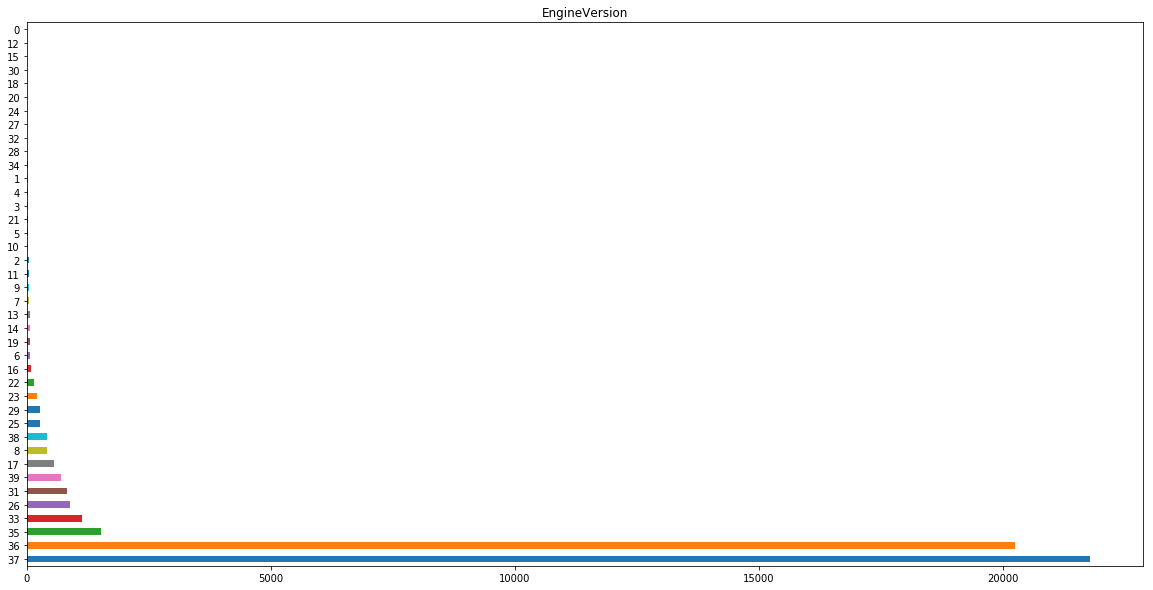

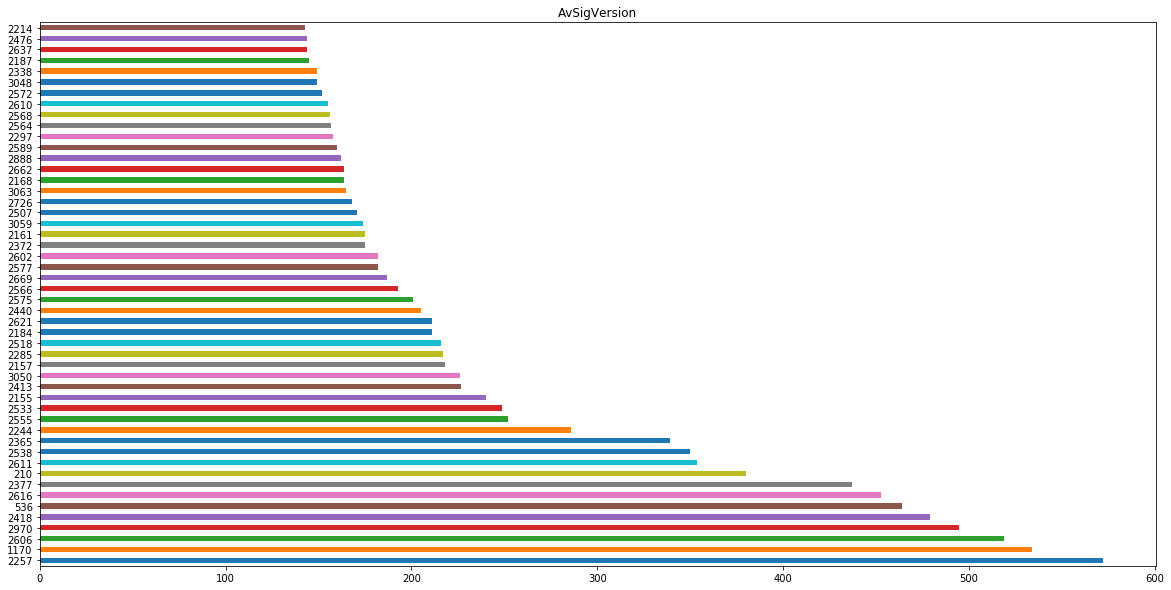

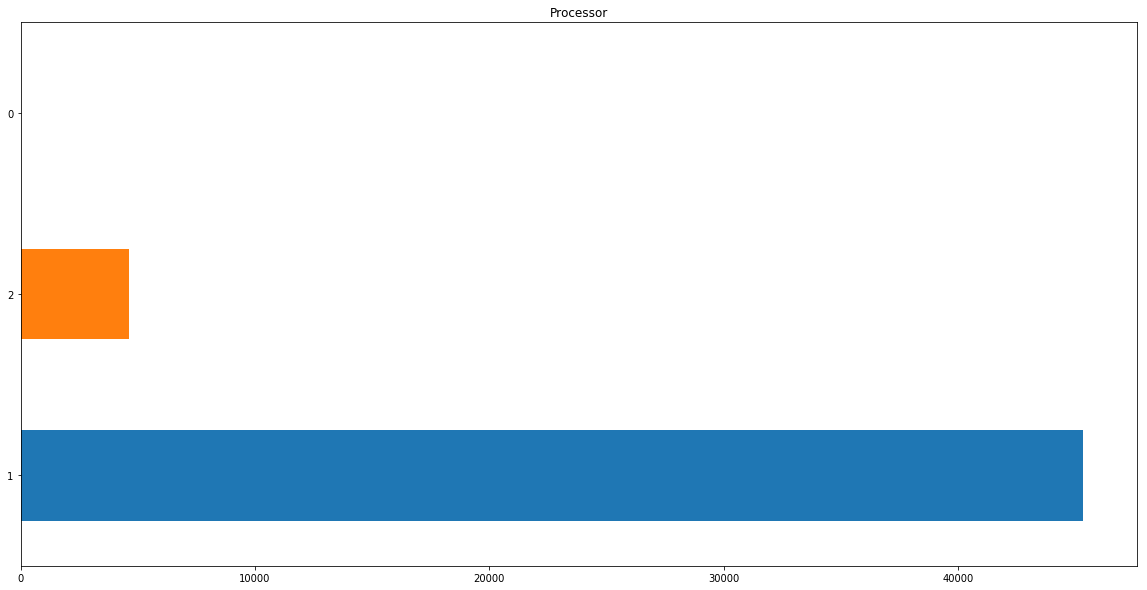

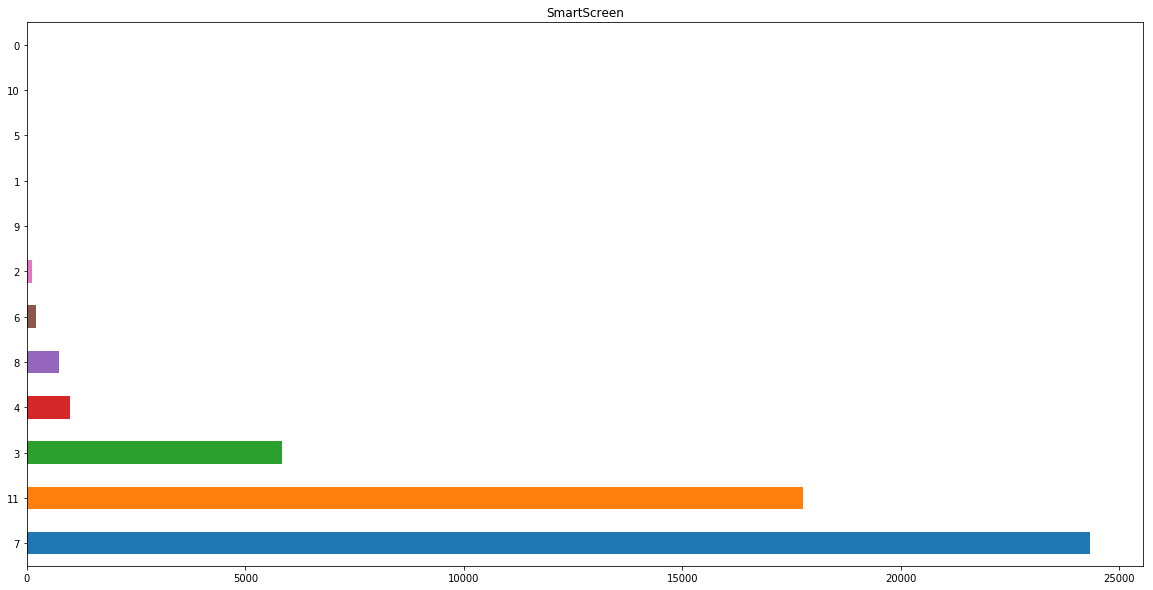

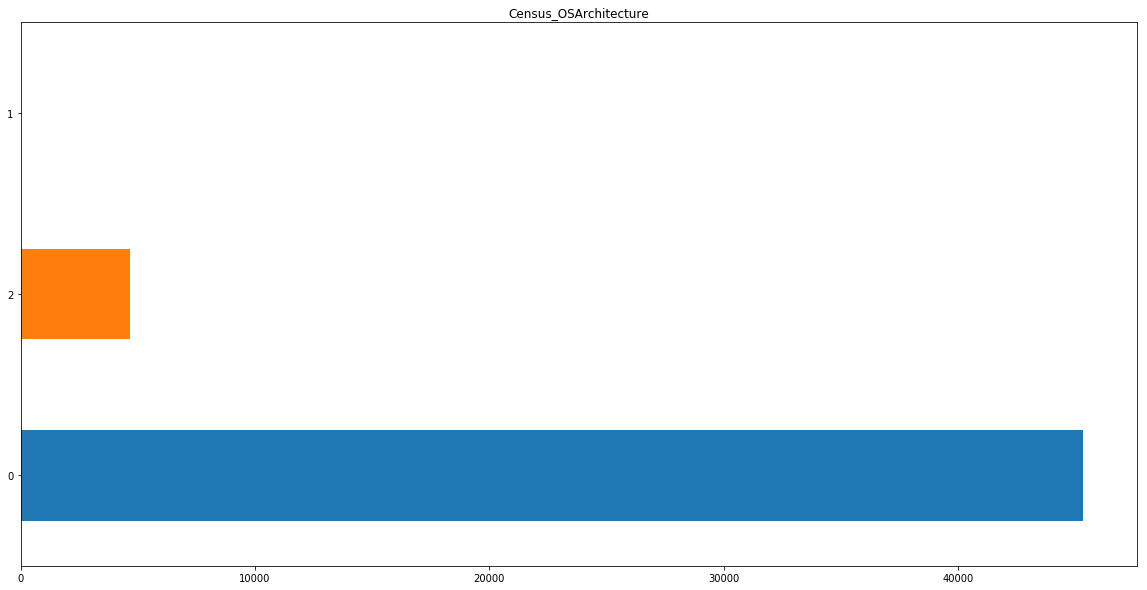

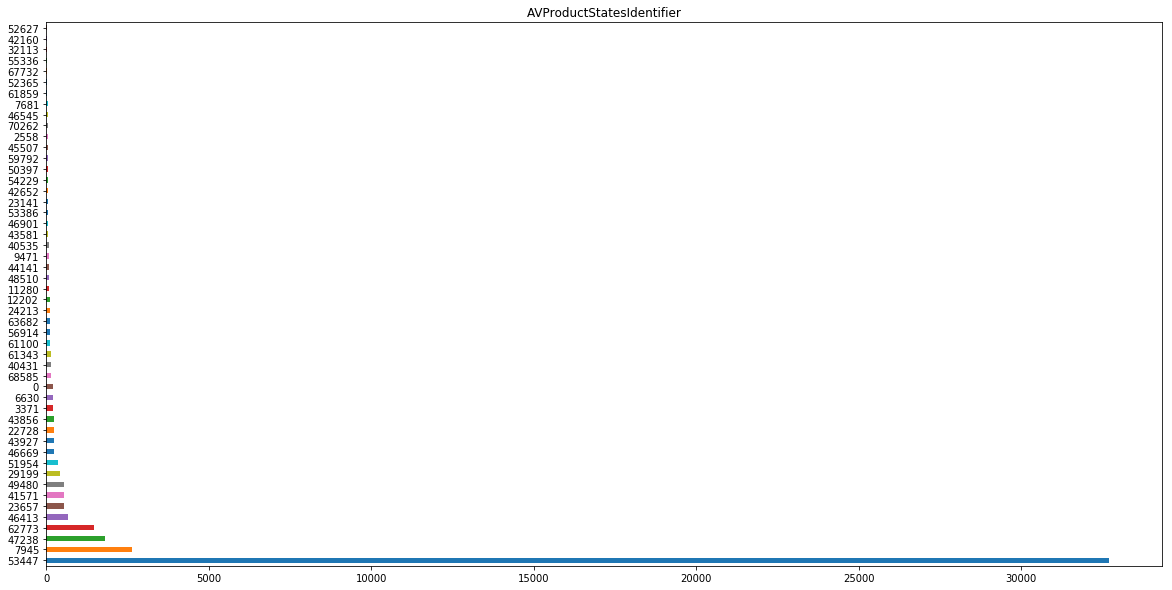

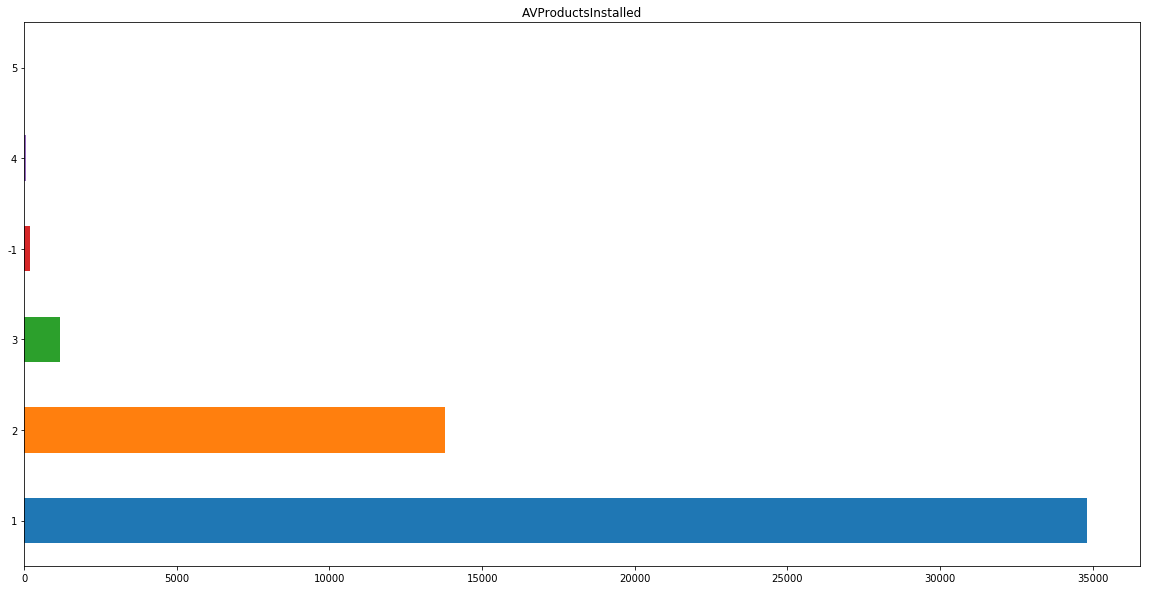

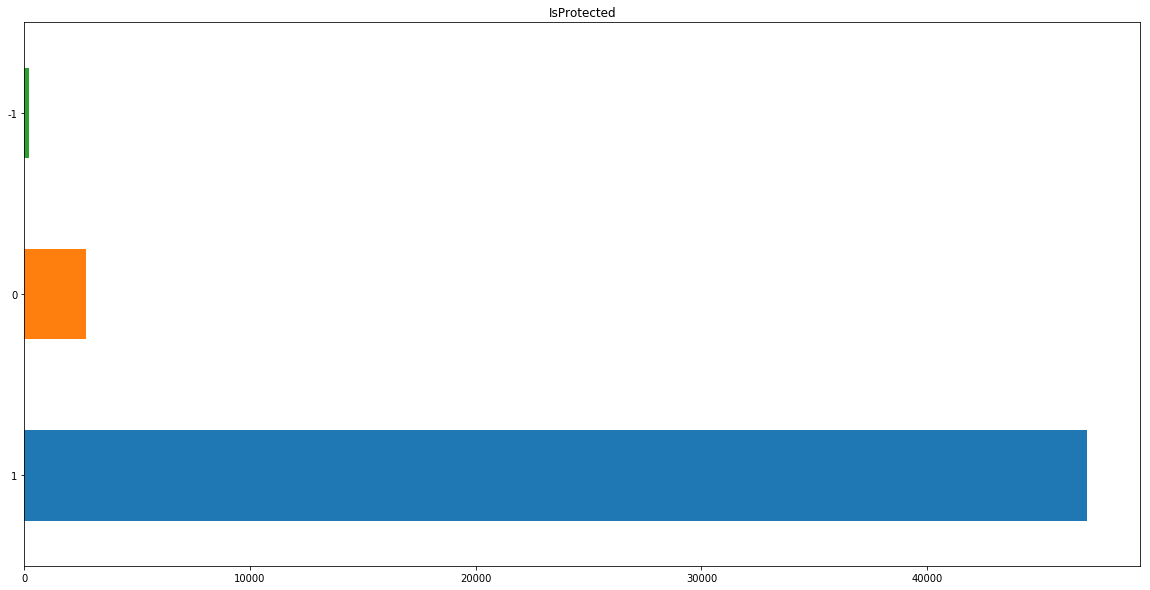

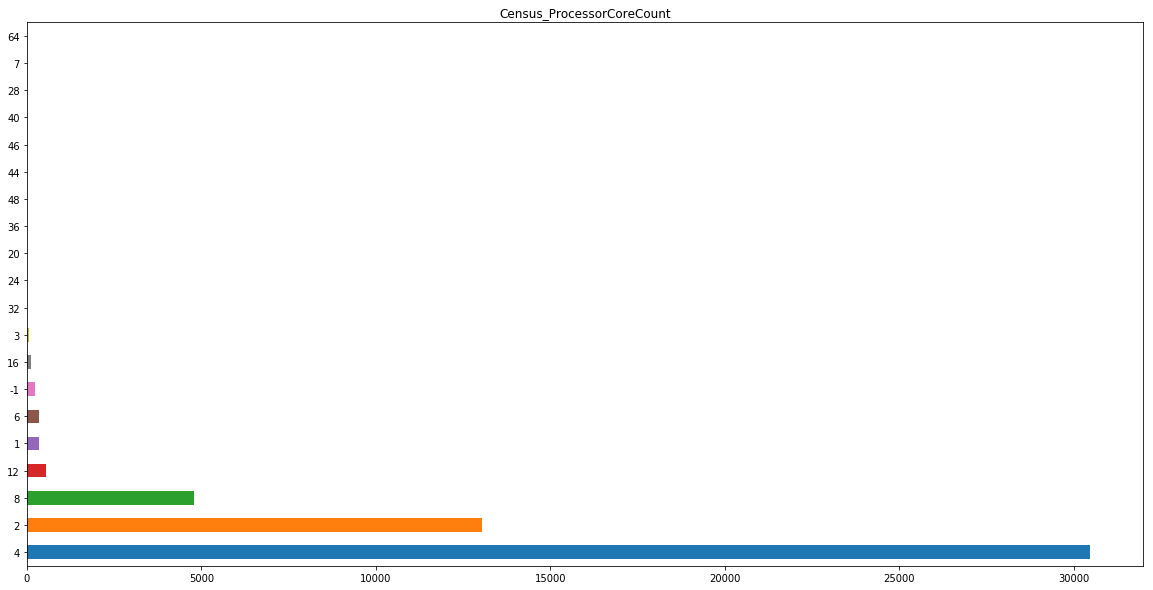

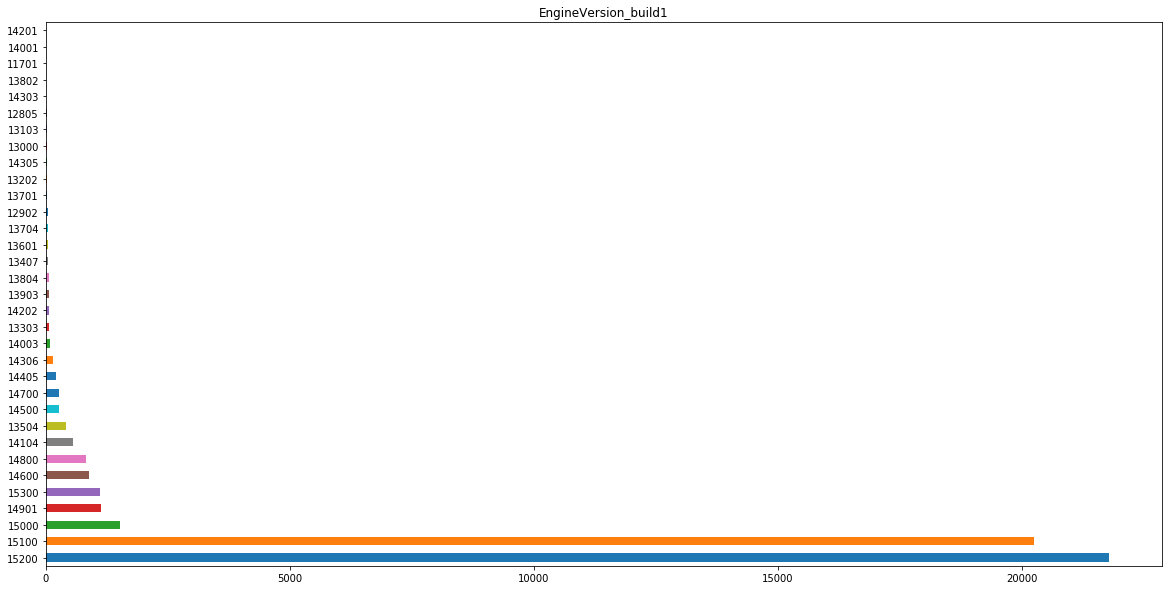

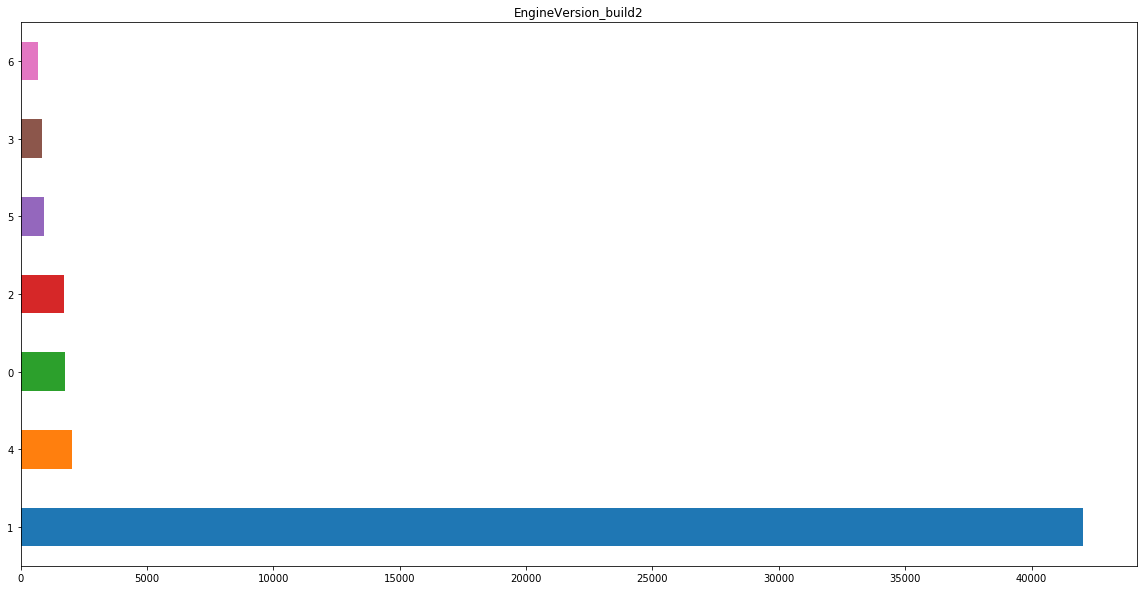

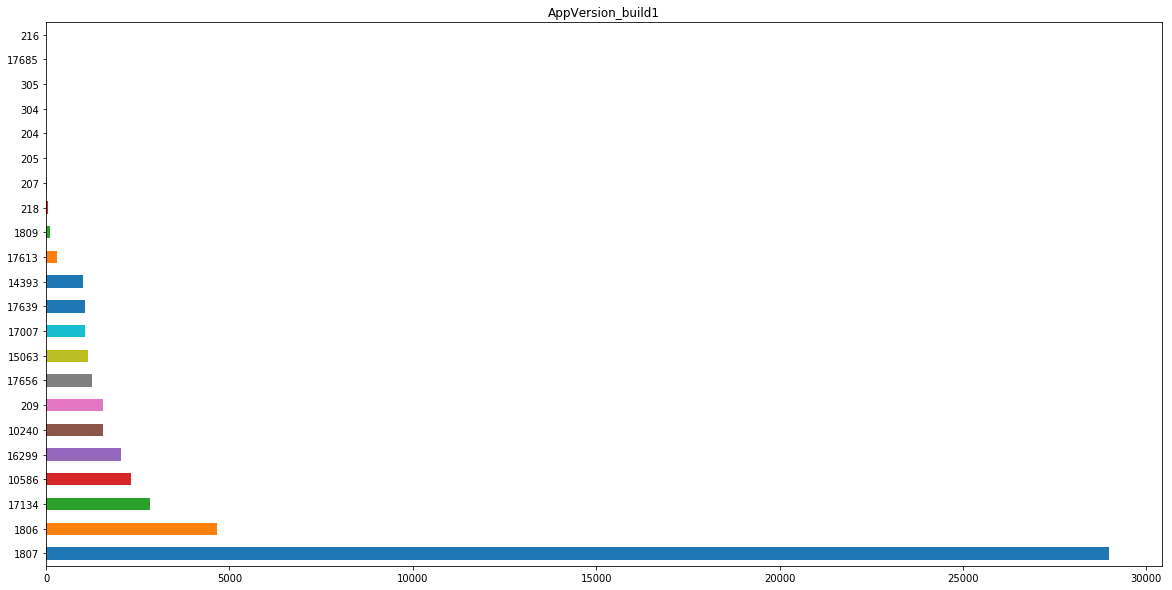

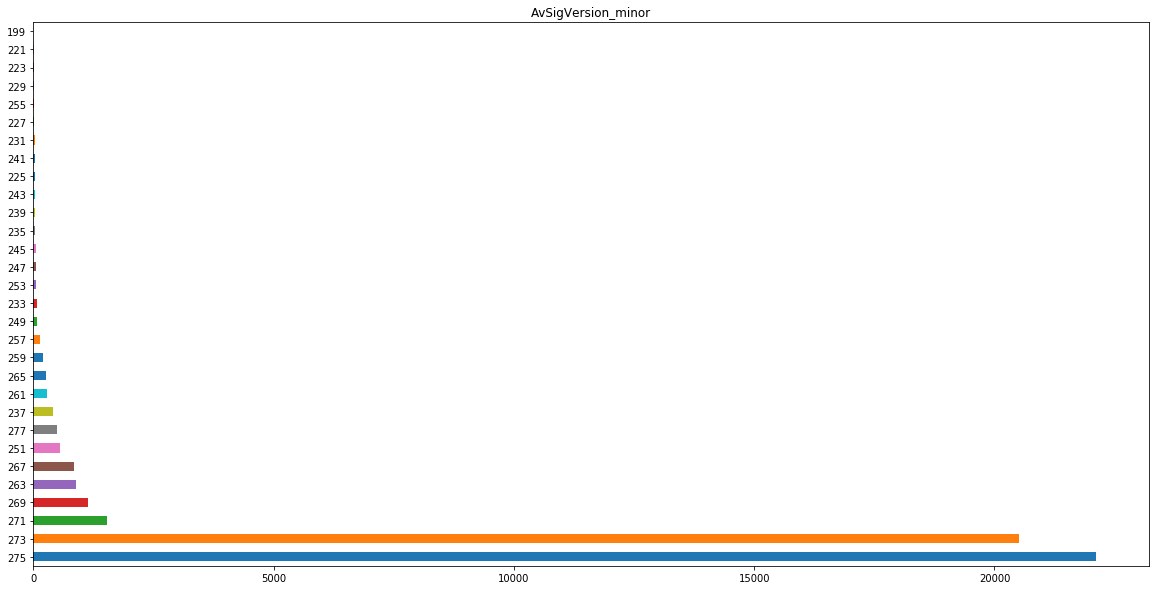

In [83]:
import matplotlib.pyplot as plt

for i, col in enumerate(correlated_cols):
    #count = train_data[col].value_counts(sort=False).sort_values(ascending=False).nlargest(50)
    plt.figure(i)
    train_data[col].value_counts(sort=False).sort_values(ascending=False).nlargest(50).plot(kind='barh', figsize=(20,10), title=col)
    #sns.set(style="darkgrid")
    #sns.barplot(count.index, count.values, alpha=0.9)
    #plt.hist(x=count)
    #plt.figsize=[20,10]
    #plt.title('Frequency Distribution of ' + col )
    #plt.ylabel('Number of Occurrences', fontsize=12)
    #plt.xlabel(col, fontsize=12)
    #plt.show()
    
#    


In [98]:
# function to create new train, test and dev samples pulling data from the training set using random stratification on the outcome variable
from sklearn.model_selection import train_test_split
def generate_train_test_dev_minis(n, features, labels):
    sample_size = n / features.shape[0]
    reserved_size = 1-sample_size
    X_train, X_test_and_dev_and_rest, y_train, y_test_and_dev_and_rest = train_test_split(features, labels, stratify=labels, test_size=reserved_size, random_state=0)
    reserved_size = 1-X_train.shape[0]/X_test_and_dev_and_rest.shape[0]
    X_test, X_dev_and_rest, y_test, y_dev_and_rest = train_test_split(X_test_and_dev_and_rest, y_test_and_dev_and_rest, stratify=y_test_and_dev_and_rest, test_size=reserved_size, random_state=0)
    reserved_size = 1-X_test.shape[0]/X_dev_and_rest.shape[0]
    X_dev, X_rest, y_dev, y_rest = train_test_split(X_dev_and_rest, y_dev_and_rest, stratify=y_dev_and_rest, test_size=reserved_size, random_state=0)
    return X_train, X_test, X_dev, y_train, y_test, y_dev

In [137]:
X_train, X_test, X_dev, y_train, y_test, y_dev = generate_train_test_dev_minis(50000, train_data, train_labels)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(X_dev.shape)

(50000, 96)
(50000, 96)
(50000, 96)


Memory usage of dataframe is 41.25 MB
Memory usage after optimization is: 7.58 MB
Decreased by 81.6%


In [192]:
X_train = train_data[columns]
y_train = train_labels
X_test = test_data[columns]
y_test = test_labels

In [193]:
classifier =  KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)

[[21975  3036]
 [22163  2826]]
0.50398


In [194]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)

[[ 3286 21725]
 [ 1647 23342]]
0.46743999999999997


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [195]:
 def run_PCA_GMM_analysis(param_threshold, X_train, X_test, y_train, y_test):
    # set up a series of conditions where the parameter sum of PCA
    # components and GMM components will be <= 50
    # Parameters will be expressed in terms of G = GMM components, 
    # P = PCA components and C = Number of classes 
    C = 2 # number of classes will always be two for this experiment
    # P and G combinations are what will change based on their relationship with
    # the covariance type
    # First line up a cartesian matrix of PCA and GMM components possibilities
    P, G = np.meshgrid(np.arange(1, param_threshold), np.arange(1, param_threshold))
    # Define possible combinations where the sum of parameters will be <= param_threshold
    # depending on the covariance type
    # The parameter count formula calculations were found on
    # https://stats.stackexchange.com/questions/280893/number-of-parameters-in-multivariate-gaussian-for-different-covariance-matrices/280896#280896
    diag_params = 2 * P * G * C <= param_threshold
    full_params = ((P * G) + (P * (P + 1) * G) / 2) * C <= param_threshold
    sphe_params = (P + 1) * G * C <= param_threshold
    tied_params = ((P * G) + (P * (P + 1)) / 2) * C <= param_threshold
    experiments = [sphe_params, diag_params, tied_params, full_params]
    CT = ['spherical', 'diag', 'tied', 'full']
    # store the winning hyperparameters
    winning_accuracy = 0.0
    winning_CT = None
    winning_PCA = None
    winning_GMM = None
    # keep track of all the trials for sorting / displaying
    trials = np.empty((0,4))
    # run through each experiment - spherical, diag, tied and full
    for i, experiment in enumerate(experiments):
    # iterate through the combinatorial product of PCA components and GMM 
    # components that sum up to less than 50 parameter combinations for the
    # experiment
        for p, g in np.column_stack((P[experiment], G[experiment])):
            pca = PCA(p)
            projected = pca.fit_transform(X_train)
            projected_test = pca.transform(X_test)

            gm_mod_pos = GaussianMixture(n_components = g, covariance_type=CT[i])
            gm_mod_pos.fit(projected[y_train==1])

            gm_mod_neg = GaussianMixture(n_components = g, covariance_type=CT[i])
            gm_mod_neg.fit(projected[y_train==0])

            prob_pos = gm_mod_pos.score_samples(projected_test)
            prob_neg = gm_mod_neg.score_samples(projected_test)

            winning_predictions = np.where(prob_pos >= prob_neg, 1, 0)
            accuracy = metrics.accuracy_score(y_test, winning_predictions)
            trials = np.append(trials, np.array([[p, g, i, accuracy]]), axis=0)
            if accuracy > winning_accuracy:
                winning_accuracy = accuracy
                winning_CT = CT[i]
                winning_PCA = p
                winning_GMM = g

    # calculate the parameter count for the winning experiment using its 
    # hyperparameters
    if winning_CT=='spherical':
        winning_params = (winning_PCA + 1) * winning_GMM * C 
    elif winning_CT=='diag':
        winning_params = (2 * winning_PCA * winning_GMM * C)
    elif winning_CT=='full':
        winning_params = ((winning_PCA * winning_GMM) + 
                          (winning_PCA * (winning_PCA + 1) * winning_GMM) / 2) * C
    elif winning_CT=='tied':
        winning_params = ((winning_PCA * winning_GMM) + 
                          (winning_PCA * (winning_PCA + 1)) / 2) * C
    print("Best accuracy is {:5.4f} with {} parameters".format(
        winning_accuracy, winning_params))
    print("PCA components = {}, GMM components = {}, covariance_type = {}".format(
        winning_PCA, winning_GMM, winning_CT))
    trials = trials[trials[:,3].argsort()[::-1], :]
    print("\n| Rank | PCA | GMM | Cov. Type | Accuracy |")
    print("+------+-----+-----+-----------+----------+")
    for i, trial in enumerate(trials):
        print("| {:4} | {:3} | {:3} | {} | {:9.4f}|".format(
            i+1, int(trial[0]), int(trial[1]),
            CT[int(trial[2])].rjust(9), trial[3]))

In [196]:
run_PCA_GMM_analysis(120, X_train, X_test, y_train, y_test)

Best accuracy is 0.5576 with 108 parameters
PCA components = 27, GMM components = 1, covariance_type = diag

| Rank | PCA | GMM | Cov. Type | Accuracy |
+------+-----+-----+-----------+----------+
|    1 |  27 |   1 |      diag |    0.5576|
|    2 |  28 |   1 |      diag |    0.5575|
|    3 |  30 |   1 |      diag |    0.5532|
|    4 |  26 |   1 |      diag |    0.5531|
|    5 |  29 |   1 |      diag |    0.5469|
|    6 |  24 |   1 |      diag |    0.5454|
|    7 |  25 |   1 |      diag |    0.5437|
|    8 |  22 |   1 |      diag |    0.5435|
|    9 |  21 |   1 |      diag |    0.5430|
|   10 |  20 |   1 |      diag |    0.5426|
|   11 |  23 |   1 |      diag |    0.5423|
|   12 |  18 |   1 |      diag |    0.5385|
|   13 |  19 |   1 |      diag |    0.5379|
|   14 |  17 |   1 |      diag |    0.5373|
|   15 |  16 |   1 |      diag |    0.5345|
|   16 |  15 |   1 |      diag |    0.5318|
|   17 |  11 |   1 |      diag |    0.5318|
|   18 |  12 |   1 |      diag |    0.5309|
|   19 |  1

In [ ]:
# scratch area below

In [197]:
fsel = ske.ExtraTreesClassifier().fit(X_train, y_train)
model = SelectFromModel(fsel, prefit=True)
X_train_data_new = model.transform(X_train)
X_test_data_new = model.transform(X_test)
nb_features = X_train_data_new.shape[1]
nb_features

/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


36

In [198]:
classifier =  KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier.fit(X_train_data_new, y_train)

pred_y = classifier.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)

[[22138  2873]
 [22286  2703]]
0.50318


In [199]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train_data_new, y_train)

pred_y = classifier.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)

[[21401  3610]
 [20496  4493]]
0.48212


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [200]:
run_PCA_GMM_analysis(75, X_train_data_new, X_test_data_new, y_train, y_test)

Best accuracy is 0.5558 with 72 parameters
PCA components = 18, GMM components = 1, covariance_type = diag

| Rank | PCA | GMM | Cov. Type | Accuracy |
+------+-----+-----+-----------+----------+
|    1 |  18 |   1 |      diag |    0.5558|
|    2 |  17 |   1 |      diag |    0.5549|
|    3 |   8 |   2 |      diag |    0.5527|
|    4 |  16 |   1 |      diag |    0.5523|
|    5 |   9 |   2 |      diag |    0.5517|
|    6 |  15 |   1 |      diag |    0.5511|
|    7 |  14 |   1 |      diag |    0.5481|
|    8 |   7 |   2 |      diag |    0.5477|
|    9 |  13 |   1 |      diag |    0.5462|
|   10 |  10 |   1 |      diag |    0.5427|
|   11 |  11 |   1 |      diag |    0.5424|
|   12 |  12 |   1 |      diag |    0.5419|
|   13 |   9 |   1 |      diag |    0.5416|
|   14 |   8 |   1 |      diag |    0.5413|
|   15 |   7 |   1 |      full |    0.5389|
|   16 |   7 |   1 |      tied |    0.5389|
|   17 |   7 |   1 |      diag |    0.5371|
|   18 |   5 |   3 |      diag |    0.5345|
|   19 |   4

In [202]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
model = rfe.fit(X_train, y_train)

print("Num Features: %s" % (model.n_features_))
print("Selected Features: %s" % (model.support_))
print("Feature Ranking: %s" % (model.ranking_))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_, names=columns))


#X_train_data_new = model.transform(X_train)
#X_test_data_new = model.transform(X_test)





/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

Num Features: 3
Selected Features: [False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False  True False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
Feature Ranking: [ 7 54 77 80 29 27 28 48 11  1 60 40 67 68 62 72 41  5 33  6 17 18 35 70
 51  4 32  1 55 76  8 71 69 64  1 38 43 12 73 49  3 44 63 65 34 22 78 46
 24 25 75 58 57 74  2 36 16 23 52 19 26 53 79 59 66 20 61 31 45 15 56 42
 39 50  9 14 37 47 13 10 21 30]
Ridge model: -0.042 * X0 + 0.002 * X1 + -0.0 * X2 + 0.0 * X3 + -0.001 * X4 + 0.02 * X5 + 0.014 * X6 + 0.011 * X7 + 0.029 * X8 + -0.066 * X9 + -0.002 * X10 + -0.002 * X11 + 0.002 * X12 + -0.001 * X1

In [203]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_, names=columns))

Ridge model: -0.042 * ProductName + 0.002 * EngineVersion + -0.0 * AppVersion + 0.0 * AvSigVersion + -0.001 * IsBeta + 0.02 * RtpStateBitfield + 0.014 * IsSxsPassiveMode + 0.011 * DefaultBrowsersIdentifier + 0.029 * AVProductStatesIdentifier + -0.066 * AVProductsInstalled + -0.002 * AVProductsEnabled + -0.002 * HasTpm + 0.002 * CountryIdentifier + -0.001 * CityIdentifier + 0.002 * OrganizationIdentifier + -0.001 * GeoNameIdentifier + 0.005 * LocaleEnglishNameIdentifier + 0.131 * Platform + -0.031 * Processor + -0.181 * OsVer + -0.092 * OsBuild + 0.05 * OsSuite + -0.007 * OsPlatformSubRelease + 0.001 * OsBuildLab + -0.004 * SkuEdition + 0.031 * IsProtected + -0.001 * AutoSampleOptIn + -0.186 * PuaMode + -0.003 * SMode + 0.001 * IeVerIdentifier + -0.039 * SmartScreen + -0.001 * Firewall + 0.001 * UacLuaenable + -0.002 * Census_MDC2FormFactor + -0.372 * Census_DeviceFamily + 0.007 * Census_OEMNameIdentifier + -0.006 * Census_OEMModelIdentifier + 0.019 * Census_ProcessorCoreCount + -0.001 

In [279]:
print("Num Features: %s" % (model.n_features_))
print("Selected Features: %s" % (model.support_))
print("Feature Ranking: %s" % (model.ranking_))

#columns[c for c in (model.ranking_)]

new_cols = []
#print(np.array(model.ranking_))
i=0
for c in (model.ranking_):
    if i==50: break
    print(columns[c])
    new_cols.append(columns[c])
    i=i+1


Num Features: 3
Selected Features: [False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False  True False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
Feature Ranking: [ 7 54 77 80 29 27 28 48 11  1 60 40 67 68 62 72 41  5 33  6 17 18 35 70
 51  4 32  1 55 76  8 71 69 64  1 38 43 12 73 49  3 44 63 65 34 22 78 46
 24 25 75 58 57 74  2 36 16 23 52 19 26 53 79 59 66 20 61 31 45 15 56 42
 39 50  9 14 37 47 13 10 21 30]
DefaultBrowsersIdentifier
Census_OSArchitecture
Census_IsPenCapable
Wdft_RegionIdentifier
IeVerIdentifier
PuaMode
SMode
Census_InternalPrimaryDisplayResolutionHorizontal
HasTpm
EngineVersion
Census

In [280]:
new_cols

['DefaultBrowsersIdentifier',
 'Census_OSArchitecture',
 'Census_IsPenCapable',
 'Wdft_RegionIdentifier',
 'IeVerIdentifier',
 'PuaMode',
 'SMode',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'HasTpm',
 'EngineVersion',
 'Census_OSInstallTypeName',
 'Census_ProcessorClass',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'RtpStateBitfield',
 'Census_MDC2FormFactor',
 'IsSxsPassiveMode',
 'Platform',
 'Processor',
 'Census_OEMNameIdentifier',
 'Census_ThresholdOptIn',
 'Census_InternalBatteryType',
 'IsBeta',
 'UacLuaenable',
 'EngineVersion',
 'Census_OSBranch',
 'Census_IsTouchEnabled',
 'AVProductStatesIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FlightRing',
 'Census_IsPortableOperatingSystem',
 'EngineVersion',
 'Census_ProcessorManufacturerIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'CountryIdentifier',
 'Census_IsSecureBootEnab

In [281]:
X_train = train_data[new_cols]
X_test = test_data[new_cols]

In [282]:
classifier =  KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)

[[21661  3350]
 [21650  3339]]
0.5


In [283]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)

[[22769  2242]
 [22854  2135]]
0.5019199999999999


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [343]:
run_PCA_GMM_analysis(100, X_train, X_test, y_train, y_test)

Best accuracy is 0.5496 with 76 parameters
PCA components = 19, GMM components = 1, covariance_type = diag

| Rank | PCA | GMM | Cov. Type | Accuracy |
+------+-----+-----+-----------+----------+
|    1 |  19 |   1 |      diag |    0.5496|
|    2 |   6 |   3 |      diag |    0.5340|
|    3 |  20 |   1 |      diag |    0.5288|
|    4 |  25 |   1 |      diag |    0.5220|
|    5 |   4 |  10 |      tied |    0.5217|
|    6 |   2 |   4 | spherical |    0.5193|
|    7 |  13 |   3 | spherical |    0.5176|
|    8 |  23 |   1 |      diag |    0.5174|
|    9 |   6 |   4 |      diag |    0.5147|
|   10 |  12 |   2 |      diag |    0.5144|
|   11 |  24 |   1 |      diag |    0.5143|
|   12 |  21 |   1 |      diag |    0.5143|
|   13 |  22 |   1 |      diag |    0.5132|
|   14 |   5 |   6 |      tied |    0.5132|
|   15 |   7 |   2 |      diag |    0.5131|
|   16 |   6 |   3 |      tied |    0.5131|
|   17 |   5 |   3 |      tied |    0.5128|
|   18 |  10 |   2 |      diag |    0.5127|
|   19 |   4